# Towi variables correlation analysis with cognitive variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

%matplotlib inline

from IPython.core.display import HTML

def multi_table(table_list):
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

In [2]:
results_df = pd.read_csv("Towi_Control_Cases_Results_OK.csv")
results_df.head(3)


,Folio,1Pre-2Post,Nombre,towi_version,towi_id,buyTicketTimeOfComp,normalPackScore,reversePackScore,packTimeOfComp,timeLab2,...,unPackGroupingSample1,unPackGroupingSample2,unPackGroupingSample3,unPackGroupingSample4,unPackSpacialPrecisionSample,unPackSpacialPrecisionSample1,unPackSpacialPrecisionSample2,unPackSpacialPrecisionSample3,unPackSpacialPrecisionSample4,unPackTimeOfComp.1
0,10,1,Valeria Jehana Magaña Moreno,2,278,53,5,2,320,16.622789,...,1.0,3.0,1.0,2.0,"[0,0,0,0]",0,0,0,0,286
1,10,2,Valeria Jehana Magaña Moreno,3,278,128,4,5,542,57.421303,...,2.0,2.0,2.0,0.0,"[1,4,8,0]",1,4,8,0,291
2,11,1,Daniel Sebastian Peralta García,2,279,103,5,4,457,30.044230,...,0.0,2.0,3.0,3.0,"[3,5,4,4]",3,5,4,4,410


In [3]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 76 columns):
Folio                                    145 non-null int64
1Pre-2Post                               145 non-null int64
Nombre                                   145 non-null object
towi_version                             145 non-null int64
towi_id                                  145 non-null int64
buyTicketTimeOfComp                      145 non-null int64
normalPackScore                          145 non-null int64
reversePackScore                         145 non-null int64
packTimeOfComp                           145 non-null int64
timeLab2                                 145 non-null float64
timeLab4                                 145 non-null float64
timeLab5                                 145 non-null float64
timeOfLab 3(X)                           145 non-null float64
latLab2                                  145 non-null float64
latLab4                                  145

In [4]:
interpretation_original_df = pd.read_csv("Towi_Control_Cases_Results_Interpretation.csv")
interpretation_post_df = interpretation_original_df
interpretation_post_df.head(3)

,test_Id_Num,1-pre-2-post,initials,name,place,towi_version,towi_id,eval_date,age,school_grade,...,audioverbal_memory,selective_attention,visual_memory.1,visual_espacial_amplitude,visual_espacial_work_memory,sustained_attention,time_inhibitory_control,inhibitory_control_hit,visual_analysis,visual_synthesis
0,10,1,VJMM-CH,Valeria Jehana Magaña Moreno,CH,2,278,3-Octubre-2014,8.0,3.0,...,6.0,12,7.0,7,12,1,NaN,NaN,8,8.0
1,11,1,DSPG-CH,Daniel Sebastian Peralta García,CH,2,279,31-Octubre-2014,8.0,3.0,...,6.0,7,5.0,10,12,1,NaN,NaN,10,9.0
2,12,1,DALC-CH,David Alejandro Lino Cesário,CH,2,280,31-Octubre-2014,10.0,5.0,...,10.0,12,14.0,9,7,11,9.0,5.0,5,11.0


In [5]:
interpretation_post_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 25 columns):
test_Id_Num                    129 non-null int64
1-pre-2-post                   129 non-null int64
initials                       129 non-null object
name                           129 non-null object
place                          129 non-null object
towi_version                   129 non-null int64
towi_id                        129 non-null int64
eval_date                      128 non-null object
age                            129 non-null float64
school_grade                   127 non-null float64
gender                         129 non-null int64
attentional_amplitude          129 non-null int64
audio_verbal_work_memory       129 non-null int64
encoded_audioverbal_memory     129 non-null int64
visual_memory                  128 non-null float64
audioverbal_memory             128 non-null float64
selective_attention            129 non-null int64
visual_memory.1                12

In [6]:
merged_df = pd.merge(interpretation_post_df, results_df, how="right", on="towi_id")
merged_df.head(5)


,test_Id_Num,1-pre-2-post,initials,name,place,towi_version_x,towi_id,eval_date,age,school_grade,...,unPackGroupingSample1,unPackGroupingSample2,unPackGroupingSample3,unPackGroupingSample4,unPackSpacialPrecisionSample,unPackSpacialPrecisionSample1,unPackSpacialPrecisionSample2,unPackSpacialPrecisionSample3,unPackSpacialPrecisionSample4,unPackTimeOfComp.1
0,10.0,1.0,VJMM-CH,Valeria Jehana Magaña Moreno,CH,2.0,278,3-Octubre-2014,8.0,3.0,...,1.0,3.0,1.0,2.0,"[0,0,0,0]",0,0,0,0,286
1,10.0,2.0,VJMM-CH,Valeria Jehana Magaña Moreno,CH,2.0,278,6/Julio/2015,9.0,3.0,...,1.0,3.0,1.0,2.0,"[0,0,0,0]",0,0,0,0,286
2,10.0,1.0,VJMM-CH,Valeria Jehana Magaña Moreno,CH,2.0,278,3-Octubre-2014,8.0,3.0,...,2.0,2.0,2.0,0.0,"[1,4,8,0]",1,4,8,0,291
3,10.0,2.0,VJMM-CH,Valeria Jehana Magaña Moreno,CH,2.0,278,6/Julio/2015,9.0,3.0,...,2.0,2.0,2.0,0.0,"[1,4,8,0]",1,4,8,0,291
4,11.0,1.0,DSPG-CH,Daniel Sebastian Peralta García,CH,2.0,279,31-Octubre-2014,8.0,3.0,...,0.0,2.0,3.0,3.0,"[3,5,4,4]",3,5,4,4,410


In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 255
Data columns (total 100 columns):
test_Id_Num                              239 non-null float64
1-pre-2-post                             239 non-null float64
initials                                 239 non-null object
name                                     239 non-null object
place                                    239 non-null object
towi_version_x                           239 non-null float64
towi_id                                  256 non-null int64
eval_date                                237 non-null object
age                                      239 non-null float64
school_grade                             235 non-null float64
gender                                   239 non-null float64
attentional_amplitude                    239 non-null float64
audio_verbal_work_memory                 239 non-null float64
encoded_audioverbal_memory               239 non-null float64
visual_memory                   

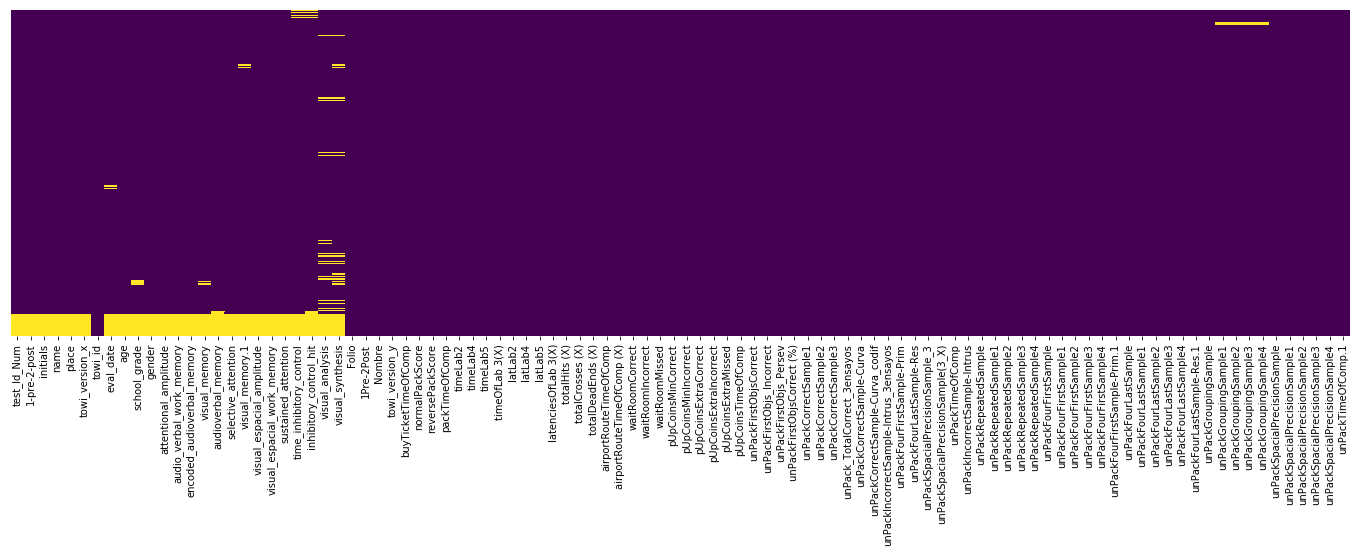

In [8]:
plt.figure(figsize=(24, 6))
sns.heatmap(merged_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

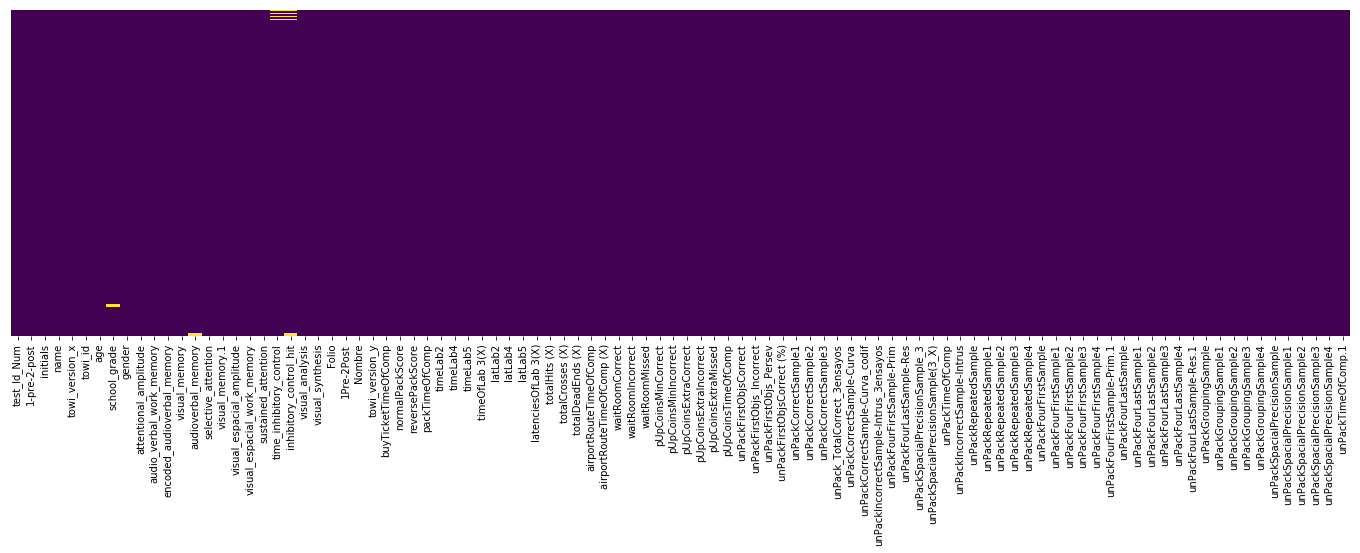

In [9]:
merged_df.drop("place", axis=1, inplace=True)
merged_df.drop("eval_date", axis=1, inplace=True)
big_df = merged_df[~(merged_df['visual_analysis'].isnull() | merged_df['visual_synthesis'].isnull() | merged_df['unPackGroupingSample1'].isnull())]
plt.figure(figsize=(24, 6))
sns.heatmap(big_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Working...


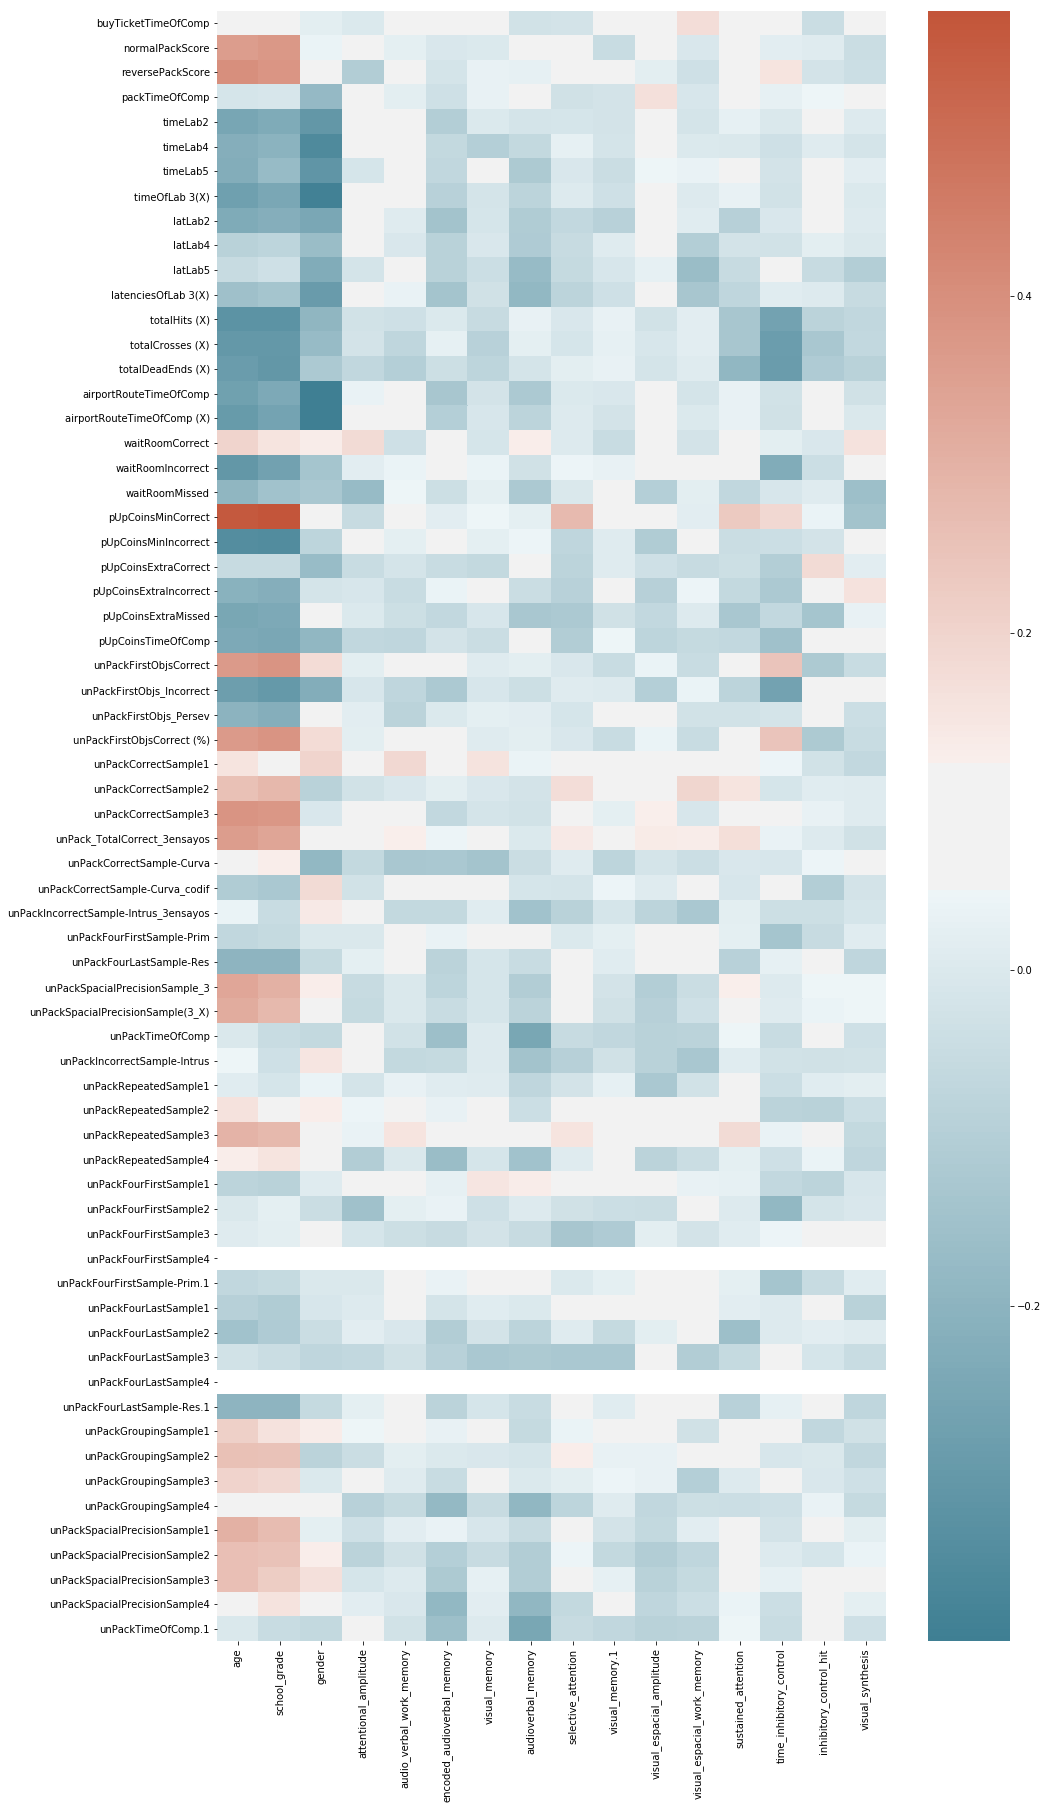

In [10]:
fig, ax = plt.subplots(figsize=(15,30))
pallete = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
big_df_corr = big_df.corr().iloc[23:, 4:20]
sns.heatmap(big_df_corr, ax = ax, cmap = pallete)
print("Working...")

In [11]:
def plot_all_interpretations(df):
    print("Working...")
    for column in df:
        plt.subplots(figsize=(25,2))
        plt.gca().set_title(column)
        sns.heatmap(df[[column]].sort_values(by=column, ascending=True).T, cmap = pallete)

Working...


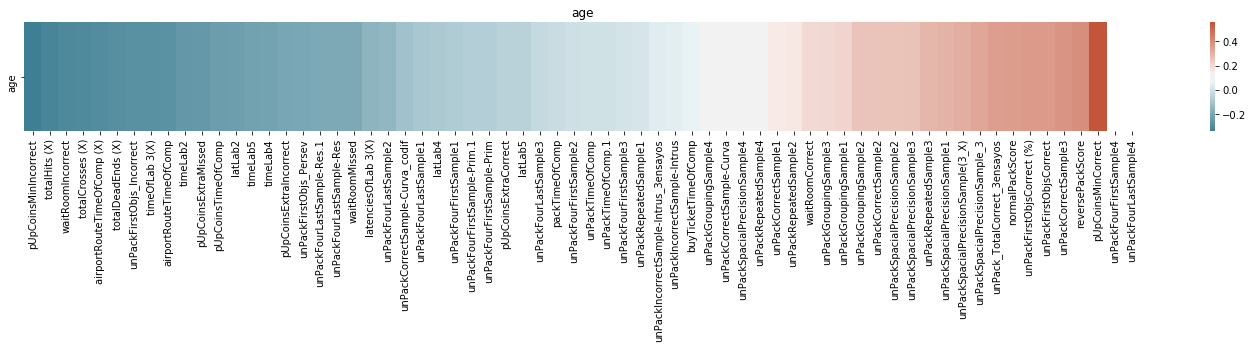

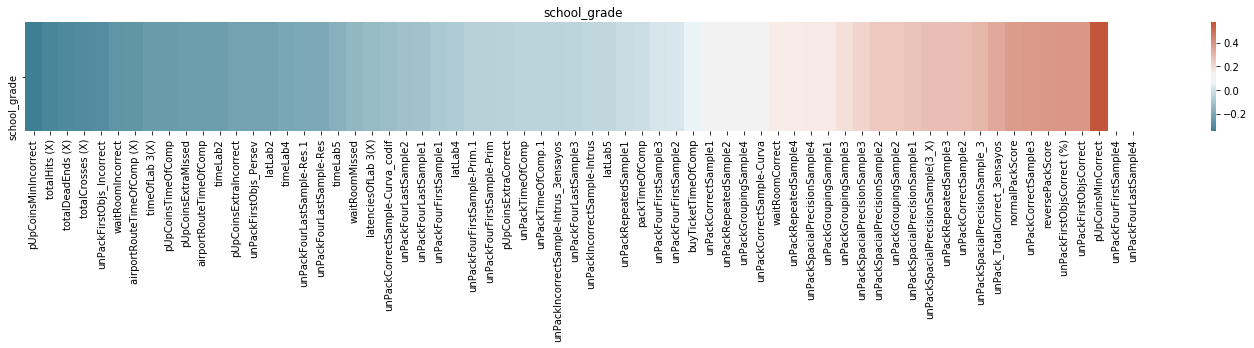

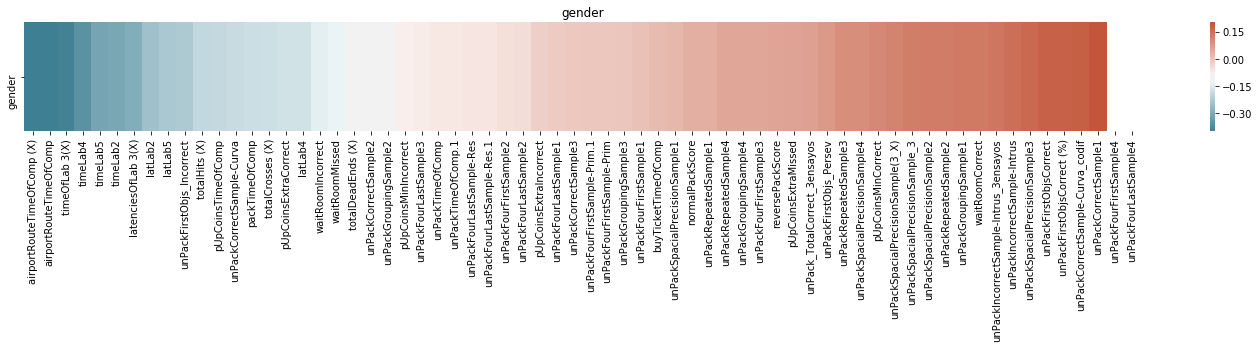

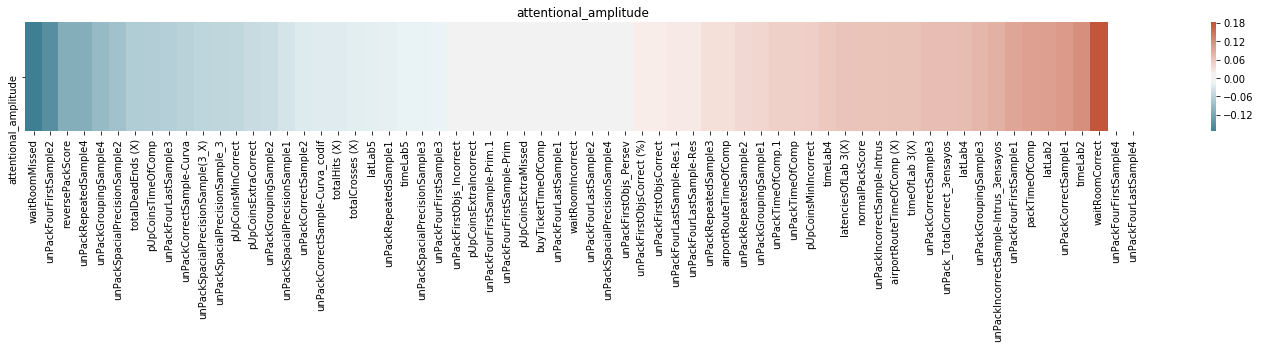

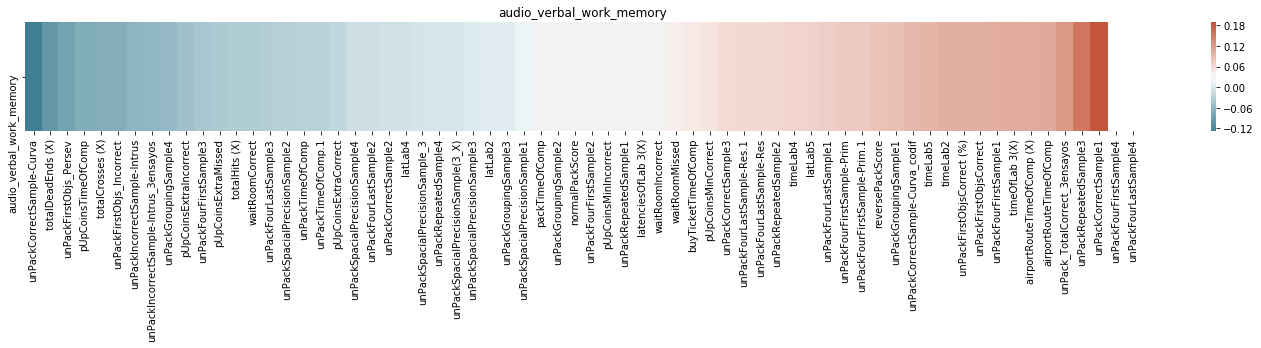

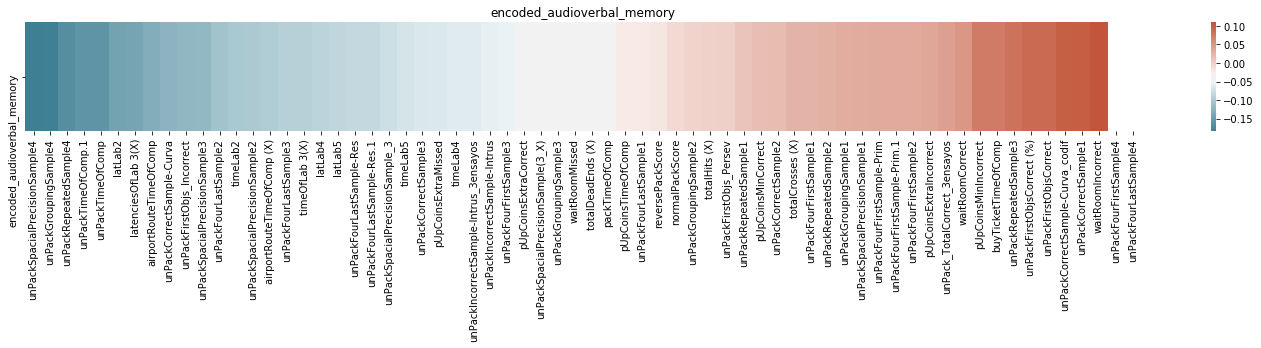

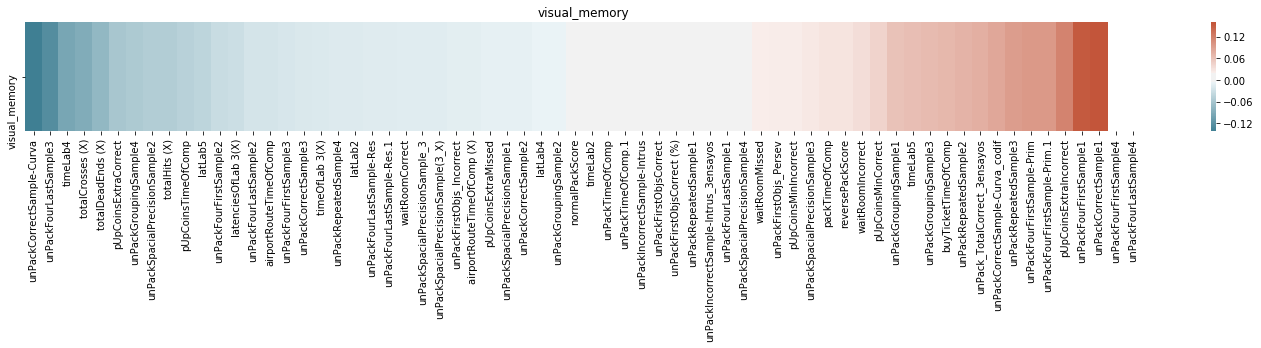

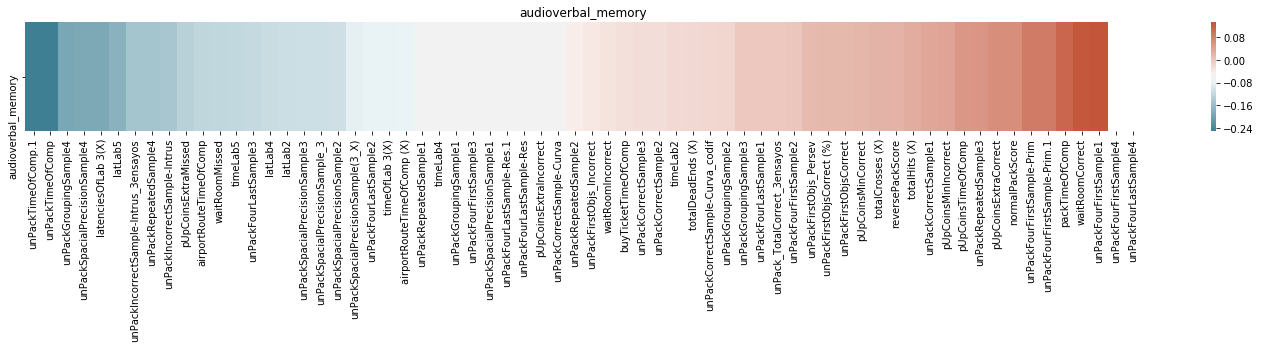

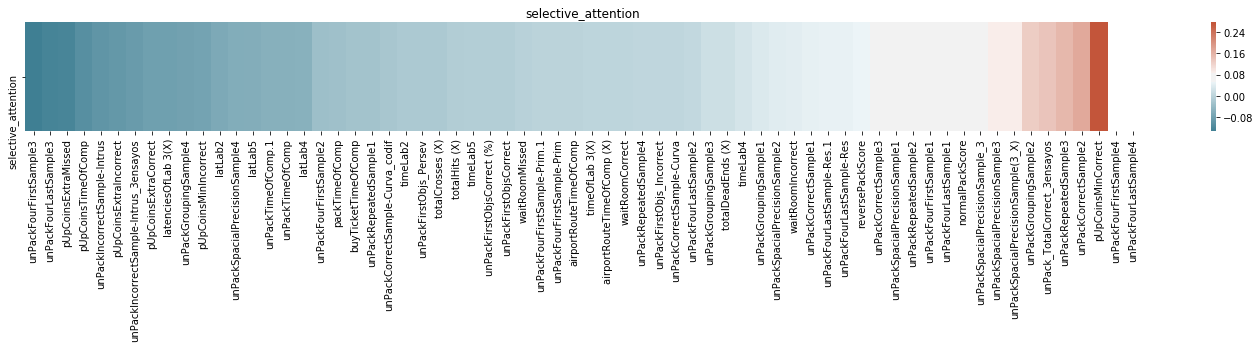

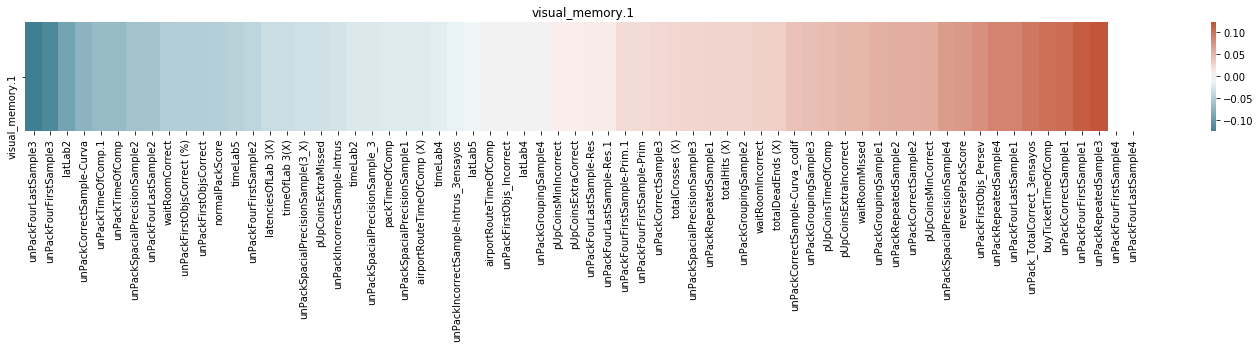

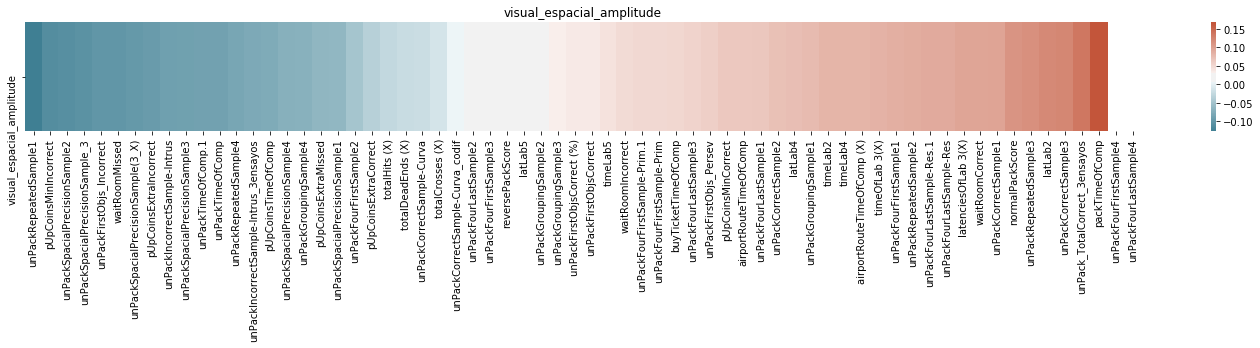

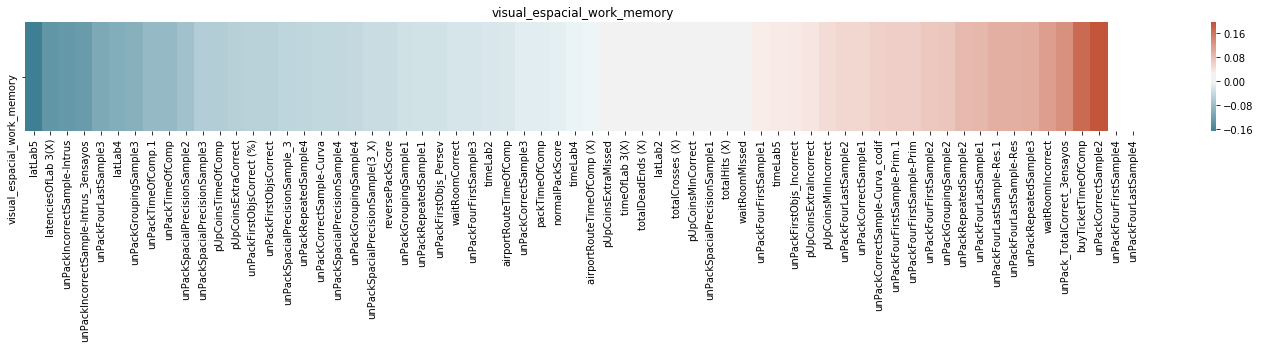

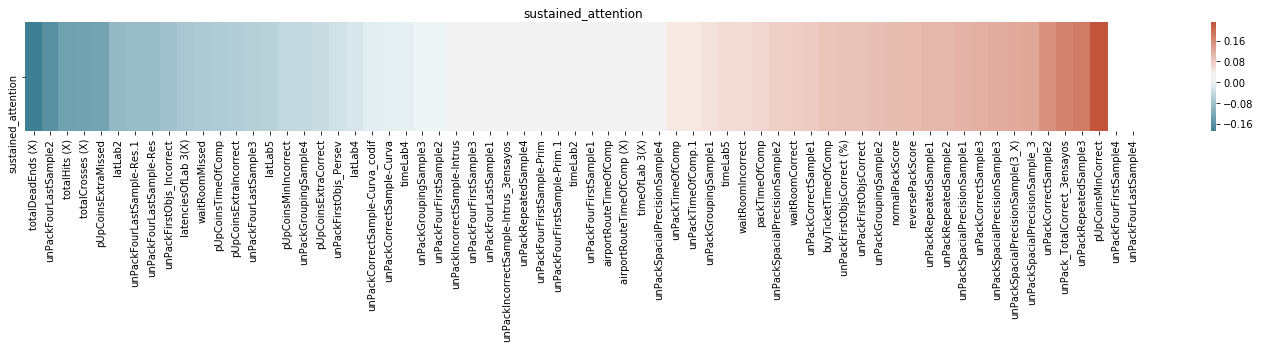

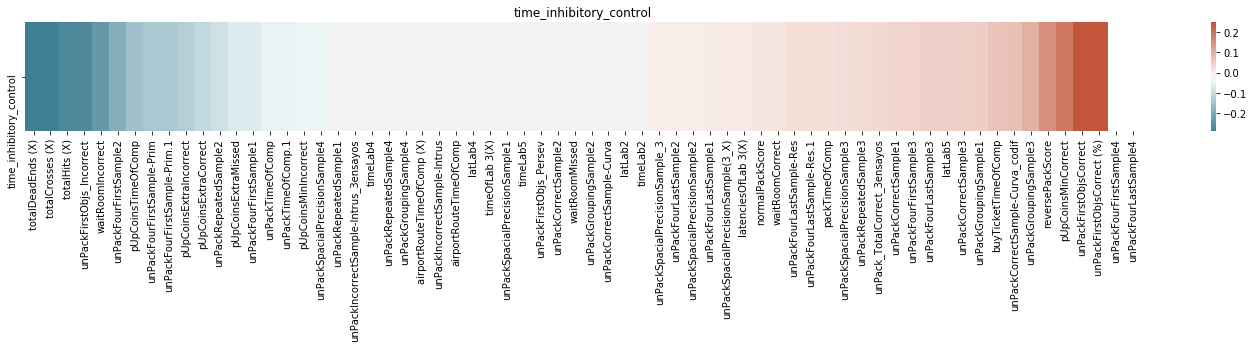

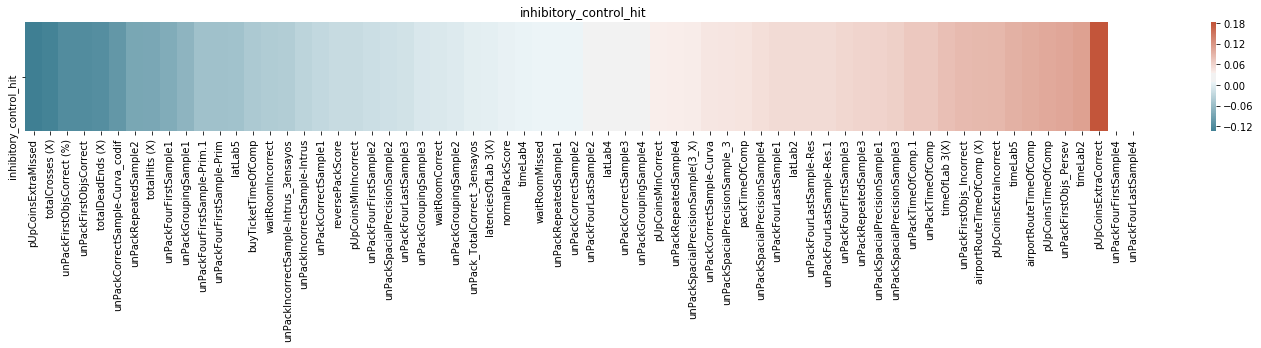

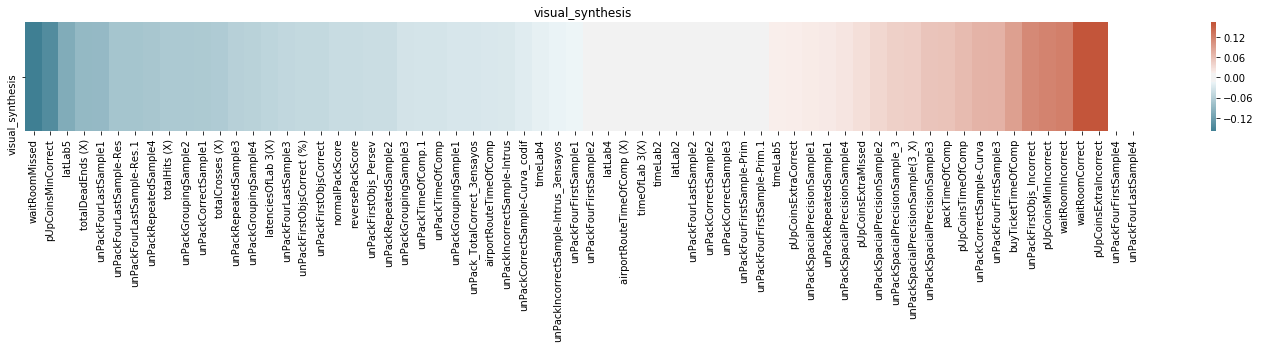

In [12]:
plot_all_interpretations(big_df_corr)

In [13]:
vars_in_game = pd.read_csv("Games_Variables.csv")
vars_in_game.head(3)
def get_games(col):
    return vars_in_game[[col.index]]
    
def plot_all_interpretations(df, vars_in_game):
    print("Working...")
    for column in df:
        a = df[[column]].sort_values(by=column, ascending=True).head(10)
        b = df[[column]].sort_values(by=column, ascending=False).head(10)
        c = []
        d = []
        for index in a.index:
            c.append(vars_in_game[index].iloc[0])
        for index in b.index:
            d.append(vars_in_game[index].iloc[0])
        a["game"] = c
        b["game"] = d
        display(multi_table([a,b]))
        f = a.groupby(["game"]).mean()
        g = b.groupby(["game"]).mean()
        display(multi_table([f,g]))
    print("Done.")

In [14]:
plot_all_interpretations(big_df_corr, vars_in_game)

Working...


,age,game
pUpCoinsMinIncorrect,-0.343604,pick_up_coins
totalHits (X),-0.320723,labs
waitRoomIncorrect,-0.305757,waiting_room
totalCrosses (X),-0.301620,labs
airportRouteTimeOfComp (X),-0.295272,driving_to_airport
totalDeadEnds (X),-0.286391,labs
unPackFirstObjs_Incorrect,-0.279297,Unpack
timeOfLab 3(X),-0.277745,labs
airportRouteTimeOfComp,-0.273518,driving_to_airport
timeLab2,-0.254348,driving_to_airport


,age
game,
Unpack,-0.279297
driving_to_airport,-0.274379
labs,-0.296620
pick_up_coins,-0.343604
waiting_room,-0.305757
,age
game,
Unpack,0.367642
arrange_the_room,0.344082


,school_grade,game
pUpCoinsMinIncorrect,-0.348191,pick_up_coins
totalHits (X),-0.322661,labs
totalDeadEnds (X),-0.305519,labs
totalCrosses (X),-0.301687,labs
unPackFirstObjs_Incorrect,-0.297927,Unpack
waitRoomIncorrect,-0.268586,waiting_room
airportRouteTimeOfComp (X),-0.262859,driving_to_airport
timeOfLab 3(X),-0.247082,labs
pUpCoinsTimeOfComp,-0.245457,pick_up_coins
pUpCoinsExtraMissed,-0.238844,pick_up_coins


,school_grade
game,
Unpack,-0.297927
driving_to_airport,-0.262859
labs,-0.294238
pick_up_coins,-0.277497
waiting_room,-0.268586
,school_grade
game,
Unpack,0.388014
arrange_the_room,0.328089


,gender,game
airportRouteTimeOfComp (X),-0.399169,driving_to_airport
airportRouteTimeOfComp,-0.397013,driving_to_airport
timeOfLab 3(X),-0.391211,labs
timeLab4,-0.354317,driving_to_airport
timeLab5,-0.312293,driving_to_airport
timeLab2,-0.305448,driving_to_airport
latenciesOfLab 3(X),-0.292352,labs
latLab2,-0.244701,driving_to_airport
latLab5,-0.228955,driving_to_airport
unPackFirstObjs_Incorrect,-0.224690,Unpack


,gender
game,
Unpack,-0.224690
driving_to_airport,-0.320271
labs,-0.341781
,gender
game,
Unpack,0.176397
arrange_the_room,0.160372
waiting_room,0.133949


,attentional_amplitude,game
waitRoomMissed,-0.173730,waiting_room
unPackFourFirstSample2,-0.150217,arrange_the_room
reversePackScore,-0.107680,packing
unPackRepeatedSample4,-0.107491,arrange_the_room
unPackGroupingSample4,-0.091635,arrange_the_room
unPackSpacialPrecisionSample2,-0.082067,arrange_the_room
totalDeadEnds (X),-0.067349,labs
pUpCoinsTimeOfComp,-0.067063,pick_up_coins
unPackFourLastSample3,-0.063067,arrange_the_room
unPackCorrectSample-Curva,-0.059786,arrange_the_room


,attentional_amplitude
game,
arrange_the_room,-0.092377
labs,-0.067349
packing,-0.107680
pick_up_coins,-0.067063
waiting_room,-0.173730
,attentional_amplitude
game,
arrange_the_room,0.086352
driving_to_airport,0.096921


,audio_verbal_work_memory,game
unPackCorrectSample-Curva,-0.128135,arrange_the_room
totalDeadEnds (X),-0.097330,labs
unPackFirstObjs_Persev,-0.084273,Unpack
pUpCoinsTimeOfComp,-0.072912,pick_up_coins
totalCrosses (X),-0.070904,labs
unPackFirstObjs_Incorrect,-0.070759,Unpack
unPackIncorrectSample-Intrus,-0.061442,arrange_the_room
unPackIncorrectSample-Intrus_3ensayos,-0.060636,arrange_the_room
unPackGroupingSample4,-0.055430,arrange_the_room
pUpCoinsExtraIncorrect,-0.048548,pick_up_coins


,audio_verbal_work_memory
game,
Unpack,-0.077516
arrange_the_room,-0.076411
labs,-0.084117
pick_up_coins,-0.060730
,audio_verbal_work_memory
game,
Unpack,0.104274
arrange_the_room,0.135706
driving_to_airport,0.106386


,encoded_audioverbal_memory,game
unPackSpacialPrecisionSample4,-0.183666,arrange_the_room
unPackGroupingSample4,-0.181992,arrange_the_room
unPackRepeatedSample4,-0.166336,arrange_the_room
unPackTimeOfComp.1,-0.159167,arrange_the_room
unPackTimeOfComp,-0.159167,arrange_the_room
latLab2,-0.142947,driving_to_airport
latenciesOfLab 3(X),-0.140458,labs
airportRouteTimeOfComp,-0.131547,driving_to_airport
unPackCorrectSample-Curva,-0.123199,arrange_the_room
unPackFirstObjs_Incorrect,-0.120604,Unpack


,encoded_audioverbal_memory
game,
Unpack,-0.120604
arrange_the_room,-0.162254
driving_to_airport,-0.137247
labs,-0.140458
,encoded_audioverbal_memory
game,
Unpack,0.090449
arrange_the_room,0.083114
boarding_pass,0.075667


,visual_memory,game
unPackCorrectSample-Curva,-0.141703,arrange_the_room
unPackFourLastSample3,-0.124476,arrange_the_room
timeLab4,-0.097051,driving_to_airport
totalCrosses (X),-0.089035,labs
totalDeadEnds (X),-0.075388,labs
pUpCoinsExtraCorrect,-0.058746,pick_up_coins
unPackGroupingSample4,-0.054507,arrange_the_room
unPackSpacialPrecisionSample2,-0.051139,arrange_the_room
totalHits (X),-0.051017,labs
pUpCoinsTimeOfComp,-0.046225,pick_up_coins


,visual_memory
game,
arrange_the_room,-0.092956
driving_to_airport,-0.097051
labs,-0.071813
pick_up_coins,-0.052486
,visual_memory
game,
arrange_the_room,0.104199
boarding_pass,0.070159
pick_up_coins,0.116987


,audioverbal_memory,game
unPackTimeOfComp.1,-0.250544,arrange_the_room
unPackTimeOfComp,-0.250544,arrange_the_room
unPackGroupingSample4,-0.190237,arrange_the_room
unPackSpacialPrecisionSample4,-0.187214,arrange_the_room
latenciesOfLab 3(X),-0.186692,labs
latLab5,-0.175033,driving_to_airport
unPackIncorrectSample-Intrus_3ensayos,-0.146992,arrange_the_room
unPackRepeatedSample4,-0.146497,arrange_the_room
unPackIncorrectSample-Intrus,-0.144623,arrange_the_room
pUpCoinsExtraMissed,-0.128782,pick_up_coins


,audioverbal_memory
game,
arrange_the_room,-0.188093
driving_to_airport,-0.175033
labs,-0.186692
pick_up_coins,-0.128782
,audioverbal_memory
game,
arrange_the_room,0.091312
packing,0.089497
pick_up_coins,0.055497


,selective_attention,game
unPackFourFirstSample3,-0.131429,arrange_the_room
unPackFourLastSample3,-0.123245,arrange_the_room
pUpCoinsExtraMissed,-0.121152,pick_up_coins
pUpCoinsTimeOfComp,-0.104856,pick_up_coins
unPackIncorrectSample-Intrus,-0.096085,arrange_the_room
pUpCoinsExtraIncorrect,-0.090198,pick_up_coins
unPackIncorrectSample-Intrus_3ensayos,-0.086865,arrange_the_room
pUpCoinsExtraCorrect,-0.079729,pick_up_coins
latenciesOfLab 3(X),-0.079462,labs
unPackGroupingSample4,-0.075831,arrange_the_room


,selective_attention
game,
arrange_the_room,-0.102691
labs,-0.079462
pick_up_coins,-0.098984
,selective_attention
game,
arrange_the_room,0.116673
packing,0.078170
pick_up_coins,0.275376


,visual_memory.1,game
unPackFourLastSample3,-0.124550,arrange_the_room
unPackFourFirstSample3,-0.114435,arrange_the_room
latLab2,-0.089047,driving_to_airport
unPackCorrectSample-Curva,-0.074357,arrange_the_room
unPackTimeOfComp.1,-0.067102,arrange_the_room
unPackTimeOfComp,-0.067102,arrange_the_room
unPackSpacialPrecisionSample2,-0.059672,arrange_the_room
unPackFourLastSample2,-0.058230,arrange_the_room
waitRoomCorrect,-0.049409,waiting_room
unPackFirstObjsCorrect (%),-0.048840,Unpack


,visual_memory.1
game,
Unpack,-0.048840
arrange_the_room,-0.080778
driving_to_airport,-0.089047
waiting_room,-0.049409
,visual_memory.1
game,
Unpack,0.078295
arrange_the_room,0.097843
boarding_pass,0.101353


,visual_espacial_amplitude,game
unPackRepeatedSample1,-0.126225,arrange_the_room
pUpCoinsMinIncorrect,-0.110093,pick_up_coins
unPackSpacialPrecisionSample2,-0.106963,arrange_the_room
unPackSpacialPrecisionSample_3,-0.103897,arrange_the_room
unPackFirstObjs_Incorrect,-0.099540,Unpack
waitRoomMissed,-0.098796,waiting_room
unPackSpacialPrecisionSample(3_X),-0.095852,arrange_the_room
pUpCoinsExtraIncorrect,-0.094033,pick_up_coins
unPackIncorrectSample-Intrus,-0.088756,arrange_the_room
unPackSpacialPrecisionSample3,-0.087350,arrange_the_room


,visual_espacial_amplitude
game,
Unpack,-0.099540
arrange_the_room,-0.101507
pick_up_coins,-0.102063
waiting_room,-0.098796
,visual_espacial_amplitude
game,
arrange_the_room,0.113337
driving_to_airport,0.121383
labs,0.096623


,visual_espacial_work_memory,game
latLab5,-0.165837,driving_to_airport
latenciesOfLab 3(X),-0.133109,labs
unPackIncorrectSample-Intrus,-0.128958,arrange_the_room
unPackIncorrectSample-Intrus_3ensayos,-0.125706,arrange_the_room
unPackFourLastSample3,-0.105659,arrange_the_room
latLab4,-0.101486,driving_to_airport
unPackGroupingSample3,-0.097556,arrange_the_room
unPackTimeOfComp.1,-0.083115,arrange_the_room
unPackTimeOfComp,-0.083115,arrange_the_room
unPackSpacialPrecisionSample2,-0.070968,arrange_the_room


,visual_espacial_work_memory
game,
arrange_the_room,-0.099297
driving_to_airport,-0.133661
labs,-0.133109
,visual_espacial_work_memory
game,
arrange_the_room,0.109295
boarding_pass,0.173641
waiting_room,0.116651


,sustained_attention,game
totalDeadEnds (X),-0.188632,labs
unPackFourLastSample2,-0.159849,arrange_the_room
totalHits (X),-0.133921,labs
totalCrosses (X),-0.132553,labs
pUpCoinsExtraMissed,-0.128368,pick_up_coins
latLab2,-0.094375,driving_to_airport
unPackFourLastSample-Res.1,-0.089896,arrange_the_room
unPackFourLastSample-Res,-0.089896,arrange_the_room
unPackFirstObjs_Incorrect,-0.080400,Unpack
latenciesOfLab 3(X),-0.071919,labs


,sustained_attention
game,
Unpack,-0.080400
arrange_the_room,-0.113214
driving_to_airport,-0.094375
labs,-0.131756
pick_up_coins,-0.128368
,sustained_attention
game,
arrange_the_room,0.135078
pick_up_coins,0.229966


,time_inhibitory_control,game
totalDeadEnds (X),-0.287013,labs
totalCrosses (X),-0.285378,labs
totalHits (X),-0.266631,labs
unPackFirstObjs_Incorrect,-0.264337,Unpack
waitRoomIncorrect,-0.232101,waiting_room
unPackFourFirstSample2,-0.187049,arrange_the_room
pUpCoinsTimeOfComp,-0.149515,pick_up_coins
unPackFourFirstSample-Prim,-0.136741,arrange_the_room
unPackFourFirstSample-Prim.1,-0.136741,arrange_the_room
pUpCoinsExtraIncorrect,-0.120194,pick_up_coins


,time_inhibitory_control
game,
Unpack,-0.264337
arrange_the_room,-0.153510
labs,-0.279674
pick_up_coins,-0.134855
waiting_room,-0.232101
,time_inhibitory_control
game,
Unpack,0.247027
arrange_the_room,0.106289


,inhibitory_control_hit,game
pUpCoinsExtraMissed,-0.134386,pick_up_coins
totalCrosses (X),-0.128483,labs
unPackFirstObjsCorrect (%),-0.118062,Unpack
unPackFirstObjsCorrect,-0.118062,arrange_the_room
totalDeadEnds (X),-0.114913,labs
unPackCorrectSample-Curva_codif,-0.103637,arrange_the_room
unPackRepeatedSample2,-0.085268,arrange_the_room
totalHits (X),-0.084831,labs
unPackFourFirstSample1,-0.079437,arrange_the_room
unPackGroupingSample1,-0.068834,arrange_the_room


,inhibitory_control_hit
game,
Unpack,-0.118062
arrange_the_room,-0.091048
labs,-0.109409
pick_up_coins,-0.134386
,inhibitory_control_hit
game,
Unpack,0.095148
driving_to_airport,0.096974
labs,0.080777


,visual_synthesis,game
waitRoomMissed,-0.159715,waiting_room
pUpCoinsMinCorrect,-0.142621,pick_up_coins
latLab5,-0.103342,driving_to_airport
totalDeadEnds (X),-0.087700,labs
unPackFourLastSample1,-0.086123,arrange_the_room
unPackFourLastSample-Res,-0.071709,arrange_the_room
unPackFourLastSample-Res.1,-0.071709,arrange_the_room
unPackRepeatedSample4,-0.070994,arrange_the_room
totalHits (X),-0.067661,labs
unPackGroupingSample2,-0.066752,arrange_the_room


,visual_synthesis
game,
arrange_the_room,-0.073458
driving_to_airport,-0.103342
labs,-0.077681
pick_up_coins,-0.142621
waiting_room,-0.159715
,visual_synthesis
game,
Unpack,0.111673
arrange_the_room,0.072029


Done.


In [15]:
big_df_corr_kendall = big_df.corr(method='kendall').iloc[23:, 4:20]


In [16]:
plot_all_interpretations(big_df_corr_kendall, vars_in_game)

Working...


,age,game
totalHits (X),-0.292112,labs
waitRoomIncorrect,-0.288760,waiting_room
totalCrosses (X),-0.267815,labs
totalDeadEnds (X),-0.242971,labs
pUpCoinsMinIncorrect,-0.241287,pick_up_coins
pUpCoinsExtraIncorrect,-0.241259,pick_up_coins
unPackFirstObjs_Incorrect,-0.233883,Unpack
waitRoomMissed,-0.228640,waiting_room
latLab2,-0.208626,driving_to_airport
pUpCoinsTimeOfComp,-0.192966,pick_up_coins


,age
game,
Unpack,-0.233883
driving_to_airport,-0.208626
labs,-0.267633
pick_up_coins,-0.225171
waiting_room,-0.258700
,age
game,
Unpack,0.304491
arrange_the_room,0.291172


,school_grade,game
totalHits (X),-0.303266,labs
totalCrosses (X),-0.290638,labs
waitRoomIncorrect,-0.288188,waiting_room
totalDeadEnds (X),-0.276710,labs
pUpCoinsMinIncorrect,-0.273892,pick_up_coins
pUpCoinsExtraIncorrect,-0.265375,pick_up_coins
unPackFirstObjs_Incorrect,-0.254493,Unpack
latLab2,-0.210120,driving_to_airport
waitRoomMissed,-0.202592,waiting_room
unPackFourLastSample-Res.1,-0.186045,arrange_the_room


,school_grade
game,
Unpack,-0.254493
arrange_the_room,-0.186045
driving_to_airport,-0.210120
labs,-0.290205
pick_up_coins,-0.269633
waiting_room,-0.245390
,school_grade
game,
Unpack,0.320524


,gender,game
airportRouteTimeOfComp,-0.345793,driving_to_airport
airportRouteTimeOfComp (X),-0.332998,driving_to_airport
timeOfLab 3(X),-0.327705,labs
timeLab4,-0.287588,driving_to_airport
timeLab5,-0.267529,driving_to_airport
timeLab2,-0.255716,driving_to_airport
latenciesOfLab 3(X),-0.243533,labs
latLab4,-0.223351,driving_to_airport
latLab5,-0.200832,driving_to_airport
unPackFirstObjs_Incorrect,-0.196622,Unpack


,gender
game,
Unpack,-0.196622
driving_to_airport,-0.273401
labs,-0.285619
,gender
game,
Unpack,0.187371
arrange_the_room,0.143827
waiting_room,0.150596


,attentional_amplitude,game
unPackRepeatedSample4,-0.141585,arrange_the_room
unPackGroupingSample4,-0.137745,arrange_the_room
reversePackScore,-0.118529,packing
unPackSpacialPrecisionSample2,-0.112528,arrange_the_room
pUpCoinsMinCorrect,-0.092286,pick_up_coins
unPackSpacialPrecisionSample_3,-0.084832,arrange_the_room
unPackSpacialPrecisionSample(3_X),-0.079085,arrange_the_room
unPackFourFirstSample2,-0.075794,arrange_the_room
unPackCorrectSample2,-0.064170,arrange_the_room
unPackSpacialPrecisionSample1,-0.063235,arrange_the_room


,attentional_amplitude
game,
arrange_the_room,-0.094872
packing,-0.118529
pick_up_coins,-0.092286
,attentional_amplitude
game,
arrange_the_room,0.078111
driving_to_airport,0.077400
labs,0.075085
packing,0.073061


,audio_verbal_work_memory,game
unPackCorrectSample-Curva,-0.098293,arrange_the_room
pUpCoinsExtraIncorrect,-0.096895,pick_up_coins
unPackFirstObjs_Persev,-0.082848,Unpack
totalCrosses (X),-0.067784,labs
totalDeadEnds (X),-0.066253,labs
unPackFirstObjs_Incorrect,-0.062527,Unpack
pUpCoinsMinIncorrect,-0.051542,pick_up_coins
pUpCoinsTimeOfComp,-0.051085,pick_up_coins
unPackGroupingSample4,-0.050738,arrange_the_room
unPackRepeatedSample4,-0.045091,arrange_the_room


,audio_verbal_work_memory
game,
Unpack,-0.072687
arrange_the_room,-0.064707
labs,-0.067018
pick_up_coins,-0.066507
,audio_verbal_work_memory
game,
Unpack,0.094518
arrange_the_room,0.097300
driving_to_airport,0.095079


,encoded_audioverbal_memory,game
unPackGroupingSample4,-0.142249,arrange_the_room
unPackRepeatedSample4,-0.138775,arrange_the_room
unPackSpacialPrecisionSample4,-0.125629,arrange_the_room
unPackTimeOfComp,-0.115936,arrange_the_room
unPackTimeOfComp.1,-0.115936,arrange_the_room
unPackSpacialPrecisionSample3,-0.095512,arrange_the_room
airportRouteTimeOfComp,-0.094675,driving_to_airport
unPackFirstObjs_Incorrect,-0.092867,Unpack
unPackFourLastSample3,-0.091047,arrange_the_room
unPackSpacialPrecisionSample2,-0.079013,arrange_the_room


,encoded_audioverbal_memory
game,
Unpack,-0.092867
arrange_the_room,-0.113012
driving_to_airport,-0.094675
,encoded_audioverbal_memory
game,
Unpack,0.052767
arrange_the_room,0.049767
labs,0.028435
pick_up_coins,0.029066


,visual_memory,game
unPackCorrectSample-Curva,-0.094877,arrange_the_room
waitRoomCorrect,-0.071119,waiting_room
unPackFourFirstSample3,-0.068434,arrange_the_room
unPackSpacialPrecisionSample2,-0.066639,arrange_the_room
unPackFourLastSample3,-0.061325,arrange_the_room
totalCrosses (X),-0.048393,labs
unPackGroupingSample4,-0.040291,arrange_the_room
unPackRepeatedSample4,-0.035968,arrange_the_room
timeLab4,-0.035848,driving_to_airport
unPackCorrectSample2,-0.029774,arrange_the_room


,visual_memory
game,
arrange_the_room,-0.056758
driving_to_airport,-0.035848
labs,-0.048393
waiting_room,-0.071119
,visual_memory
game,
arrange_the_room,0.089260
driving_to_airport,0.061538
pick_up_coins,0.056123


,audioverbal_memory,game
unPackTimeOfComp.1,-0.161856,arrange_the_room
unPackTimeOfComp,-0.161856,arrange_the_room
unPackGroupingSample4,-0.128898,arrange_the_room
unPackRepeatedSample4,-0.116736,arrange_the_room
unPackSpacialPrecisionSample4,-0.113008,arrange_the_room
unPackIncorrectSample-Intrus_3ensayos,-0.105823,arrange_the_room
unPackIncorrectSample-Intrus,-0.104383,arrange_the_room
latenciesOfLab 3(X),-0.088848,labs
pUpCoinsExtraMissed,-0.081795,pick_up_coins
unPackFourLastSample3,-0.080695,arrange_the_room


,audioverbal_memory
game,
arrange_the_room,-0.121657
labs,-0.088848
pick_up_coins,-0.081795
,audioverbal_memory
game,
Unpack,0.048842
arrange_the_room,0.075259
packing,0.067391
pick_up_coins,0.056794


,selective_attention,game
unPackFourLastSample3,-0.128606,arrange_the_room
pUpCoinsExtraIncorrect,-0.125194,pick_up_coins
unPackFourFirstSample3,-0.112933,arrange_the_room
pUpCoinsExtraMissed,-0.094604,pick_up_coins
pUpCoinsMinIncorrect,-0.077799,pick_up_coins
pUpCoinsTimeOfComp,-0.073872,pick_up_coins
totalCrosses (X),-0.064057,labs
buyTicketTimeOfComp,-0.060874,boarding_pass
unPackIncorrectSample-Intrus,-0.058223,arrange_the_room
pUpCoinsExtraCorrect,-0.049584,pick_up_coins


,selective_attention
game,
arrange_the_room,-0.099920
boarding_pass,-0.060874
labs,-0.064057
pick_up_coins,-0.084211
,selective_attention
game,
arrange_the_room,0.096226
packing,0.079928
pick_up_coins,0.188035


,visual_memory.1,game
unPackFourLastSample3,-0.125216,arrange_the_room
unPackFourFirstSample3,-0.101537,arrange_the_room
waitRoomCorrect,-0.086104,waiting_room
unPackFourFirstSample2,-0.062403,arrange_the_room
unPackSpacialPrecisionSample2,-0.058044,arrange_the_room
unPackFourLastSample2,-0.048500,arrange_the_room
unPackTimeOfComp,-0.046552,arrange_the_room
unPackTimeOfComp.1,-0.046552,arrange_the_room
unPackCorrectSample-Curva,-0.042483,arrange_the_room
normalPackScore,-0.035325,packing


,visual_memory.1
game,
arrange_the_room,-0.066411
packing,-0.035325
waiting_room,-0.086104
,visual_memory.1
game,
Unpack,0.057077
arrange_the_room,0.063958
boarding_pass,0.068450
driving_to_airport,0.056040


,visual_espacial_amplitude,game
pUpCoinsExtraIncorrect,-0.100942,pick_up_coins
unPackSpacialPrecisionSample2,-0.089703,arrange_the_room
unPackRepeatedSample1,-0.086017,arrange_the_room
unPackSpacialPrecisionSample_3,-0.083517,arrange_the_room
unPackRepeatedSample4,-0.077870,arrange_the_room
unPackGroupingSample4,-0.076217,arrange_the_room
pUpCoinsExtraMissed,-0.074905,pick_up_coins
unPackSpacialPrecisionSample(3_X),-0.072046,arrange_the_room
unPackIncorrectSample-Intrus,-0.068850,arrange_the_room
unPackSpacialPrecisionSample4,-0.061423,arrange_the_room


,visual_espacial_amplitude
game,
arrange_the_room,-0.076955
pick_up_coins,-0.087923
,visual_espacial_amplitude
game,
arrange_the_room,0.093297
boarding_pass,0.086853
driving_to_airport,0.068238
packing,0.097966


,visual_espacial_work_memory,game
unPackIncorrectSample-Intrus,-0.097205,arrange_the_room
unPackIncorrectSample-Intrus_3ensayos,-0.093275,arrange_the_room
latLab4,-0.088396,driving_to_airport
unPackCorrectSample3,-0.059385,arrange_the_room
latenciesOfLab 3(X),-0.054172,labs
unPackGroupingSample3,-0.049730,arrange_the_room
unPackSpacialPrecisionSample3,-0.047528,arrange_the_room
waitRoomCorrect,-0.047302,waiting_room
pUpCoinsTimeOfComp,-0.043543,pick_up_coins
unPackSpacialPrecisionSample2,-0.043287,arrange_the_room


,visual_espacial_work_memory
game,
arrange_the_room,-0.065068
driving_to_airport,-0.088396
labs,-0.054172
pick_up_coins,-0.043543
waiting_room,-0.047302
,visual_espacial_work_memory
game,
arrange_the_room,0.094183
boarding_pass,0.137440


,sustained_attention,game
totalDeadEnds (X),-0.147177,labs
totalCrosses (X),-0.143408,labs
totalHits (X),-0.134452,labs
unPackFourLastSample2,-0.132716,arrange_the_room
unPackFirstObjs_Incorrect,-0.091831,Unpack
pUpCoinsExtraMissed,-0.091411,pick_up_coins
latLab2,-0.068649,driving_to_airport
pUpCoinsTimeOfComp,-0.058855,pick_up_coins
unPackFourLastSample-Res,-0.055842,arrange_the_room
unPackFourLastSample-Res.1,-0.055842,arrange_the_room


,sustained_attention
game,
Unpack,-0.091831
arrange_the_room,-0.081467
driving_to_airport,-0.068649
labs,-0.141679
pick_up_coins,-0.075133
,sustained_attention
game,
Unpack,0.088894
arrange_the_room,0.099475


,time_inhibitory_control,game
totalCrosses (X),-0.215197,labs
unPackFirstObjs_Incorrect,-0.191249,Unpack
totalDeadEnds (X),-0.189818,labs
totalHits (X),-0.182748,labs
waitRoomIncorrect,-0.160572,waiting_room
pUpCoinsTimeOfComp,-0.097868,pick_up_coins
pUpCoinsExtraIncorrect,-0.092734,pick_up_coins
unPackFourFirstSample2,-0.090726,arrange_the_room
pUpCoinsExtraCorrect,-0.076653,pick_up_coins
unPackRepeatedSample1,-0.072812,arrange_the_room


,time_inhibitory_control
game,
Unpack,-0.191249
arrange_the_room,-0.081769
labs,-0.195921
pick_up_coins,-0.089085
waiting_room,-0.160572
,time_inhibitory_control
game,
Unpack,0.195452
arrange_the_room,0.080525


,inhibitory_control_hit,game
totalCrosses (X),-0.106053,labs
totalDeadEnds (X),-0.103430,labs
pUpCoinsExtraMissed,-0.099186,pick_up_coins
waitRoomIncorrect,-0.093213,waiting_room
unPackFourFirstSample1,-0.073585,arrange_the_room
totalHits (X),-0.068992,labs
unPackFirstObjsCorrect (%),-0.055482,Unpack
unPackFirstObjsCorrect,-0.055482,arrange_the_room
unPackGroupingSample2,-0.051958,arrange_the_room
unPackFourFirstSample-Prim,-0.036034,arrange_the_room


,inhibitory_control_hit
game,
Unpack,-0.055482
arrange_the_room,-0.054265
labs,-0.092825
pick_up_coins,-0.099186
waiting_room,-0.093213
,inhibitory_control_hit
game,
Unpack,0.073759
arrange_the_room,0.072411


,visual_synthesis,game
pUpCoinsMinCorrect,-0.113881,pick_up_coins
unPackFourLastSample1,-0.078542,arrange_the_room
unPackFourLastSample-Res,-0.071867,arrange_the_room
unPackFourLastSample-Res.1,-0.071867,arrange_the_room
unPackCorrectSample2,-0.065421,arrange_the_room
unPackRepeatedSample4,-0.064716,arrange_the_room
unPackGroupingSample4,-0.064282,arrange_the_room
totalDeadEnds (X),-0.063474,labs
unPack_TotalCorrect_3ensayos,-0.062306,arrange_the_room
normalPackScore,-0.058146,packing


,visual_synthesis
game,
arrange_the_room,-0.068429
labs,-0.063474
packing,-0.058146
pick_up_coins,-0.113881
,visual_synthesis
game,
Unpack,0.093971
arrange_the_room,0.035316
boarding_pass,0.041574


Done.


In [17]:
from scipy.spatial import distance
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

def plot_all_interpretations_with_kmeans(all_data_df, corr_df, vars_in_game):
    print("Working...")
    for column in corr_df:
        a = corr_df[[column]].sort_values(by=column, ascending=True).head(10)
        b = corr_df[[column]].sort_values(by=column, ascending=False).head(10)    
        c = list(a.index)+list(b.index)+list([column])
        vars_df = all_data_df[c].dropna(how='any',axis=0) 
        Y = vars_df[[column]]
        X = vars_df.drop(column, axis=1)
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(X)

        cluster_range = range( 1, 21 )
        cluster_intertias = []
        cluster_scores = []
        cluster_bic = []

        for num_clusters in cluster_range:
            clusters = KMeans( num_clusters )
            clusters.fit( scaled_data )
            cluster_intertias.append( clusters.inertia_ )
            cluster_scores.append( clusters.score(scaled_data) )
            cluster_bic.append(sum(np.min(distance.cdist(scaled_data, clusters.cluster_centers_, 'euclidean'), axis=1)) / scaled_data.shape[0])

        clusters_df = pd.DataFrame( { "num_clusters":cluster_range, 
                                 "cluster_intertias": cluster_intertias, 
                                 "cluster_scores": cluster_scores,
                                 "cluster_bic": cluster_bic} )
        if column == "age":
            print("Example silhouette")
            svisualizer = SilhouetteVisualizer(KMeans(3))
            svisualizer.fit(scaled_data) # Fit the training data to the visualizer
            svisualizer.poof()
        
        print(column)
        print(clusters_df.head(5))
        plt.figure(figsize=(12,6))
        print(column+ " score analysis")
        plt.title("KMeans Score vs N of clusters in "+column)
        plt.plot( clusters_df.num_clusters, clusters_df.cluster_scores, marker = "o" )
        plt.show()
    
        print(column+ " silhouette analysis using yellowbrick")
        visualizer = KElbowVisualizer(model=KMeans(), k=(2,21), metric='silhouette')
        visualizer.fit(scaled_data)
        visualizer.poof()
         
        pca = PCA(n_components=1).fit(X)
        pca_d = pca.transform(X)
        pca_c = pca.transform(Y)
        kmeans=KMeans(n_clusters=3)
        kmeansoutput=kmeans.fit(X)
        kmeansoutput
        plt.figure('3 Cluster K-Means')
        plt.scatter(pca_d[:, 0], pca_c[:, 0], c=kmeansoutput.labels_, cmap="jet")
        plt.xlabel('Dividend Yield')
        plt.ylabel('Returns')
        plt.title('3 Cluster K-Means')
        plt.show()
       


Working...
Example silhouette


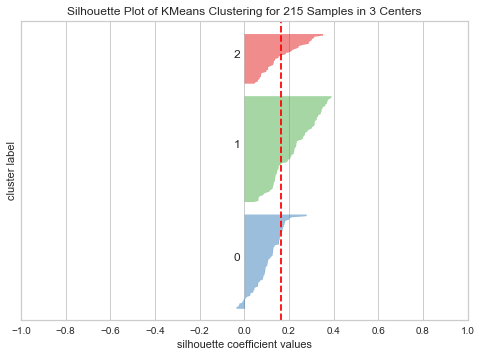

age
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.328574
1             2        3507.080047    -3507.080047     3.897139
2             3        3084.245045    -3084.245045     3.662037
3             4        2802.911463    -2802.911463     3.488954
4             5        2572.490336    -2572.490336     3.347041
age score analysis


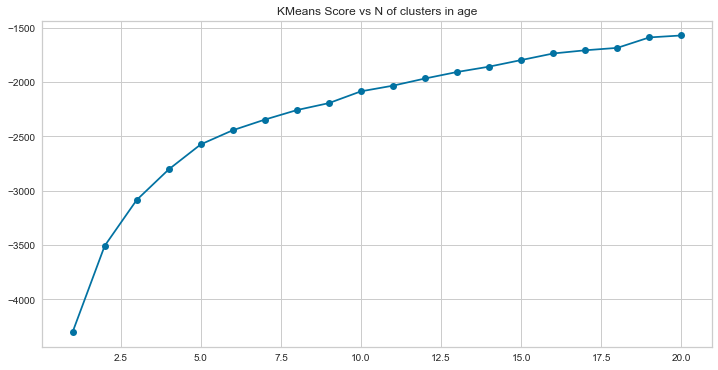

age silhouette analysis using yellowbrick


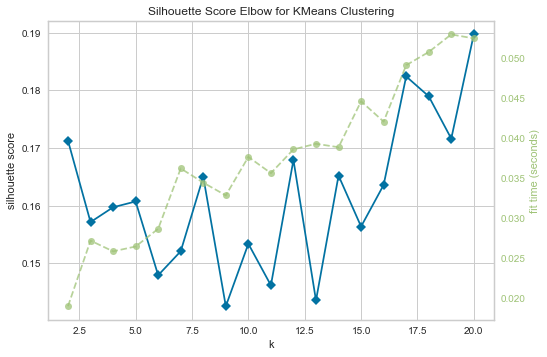

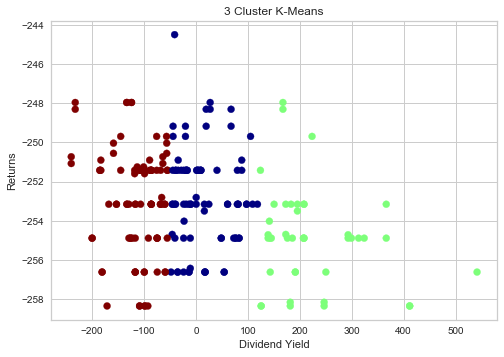

school_grade
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4260.000000    -4260.000000     4.334260
1             2        3526.131799    -3526.131799     3.938254
2             3        3205.031469    -3205.031469     3.753841
3             4        2905.907796    -2905.907796     3.578023
4             5        2692.901927    -2692.901927     3.460383
school_grade score analysis


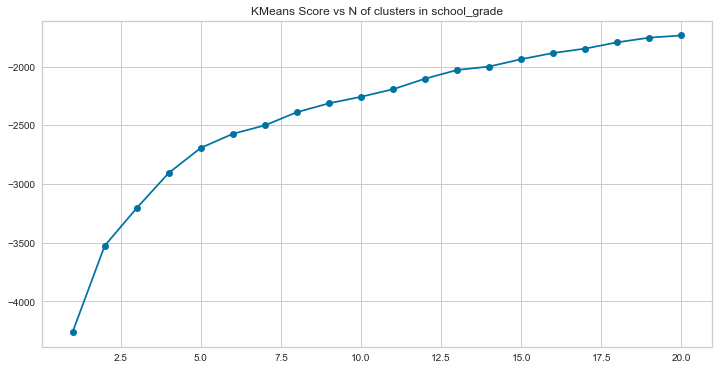

school_grade silhouette analysis using yellowbrick


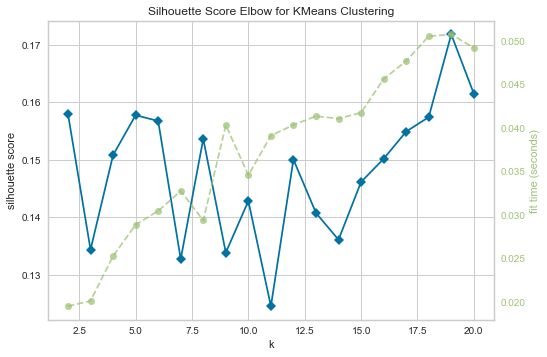

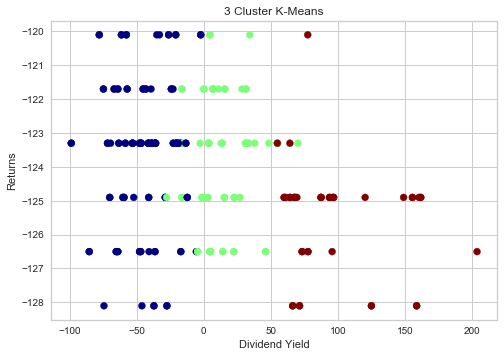

gender
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.248999
1             2        3400.097537    -3400.097537     3.830033
2             3        3001.744110    -3001.744110     3.590097
3             4        2766.594567    -2766.594567     3.441256
4             5        2594.435742    -2594.435742     3.346970
gender score analysis


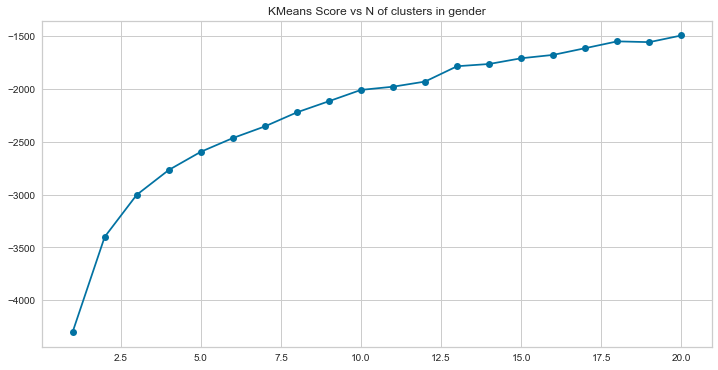

gender silhouette analysis using yellowbrick


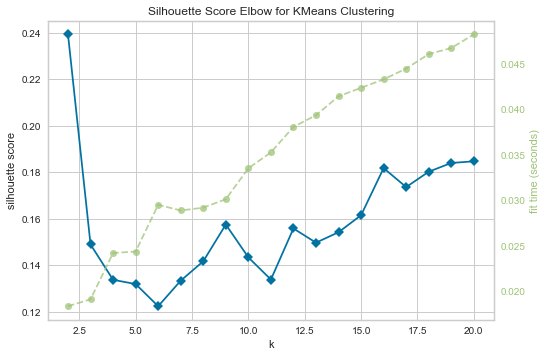

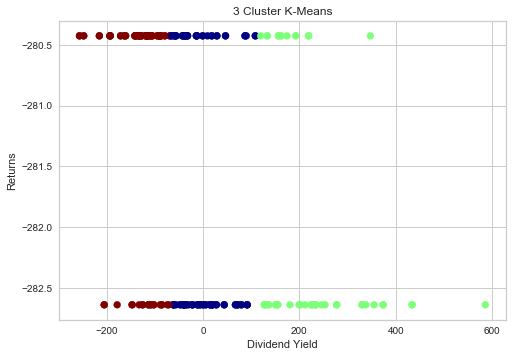

attentional_amplitude
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.246040
1             2        3746.903965    -3746.903965     3.985780
2             3        3375.027772    -3375.027772     3.751298
3             4        3100.849617    -3100.849617     3.584923
4             5        2886.896683    -2886.896683     3.509359
attentional_amplitude score analysis


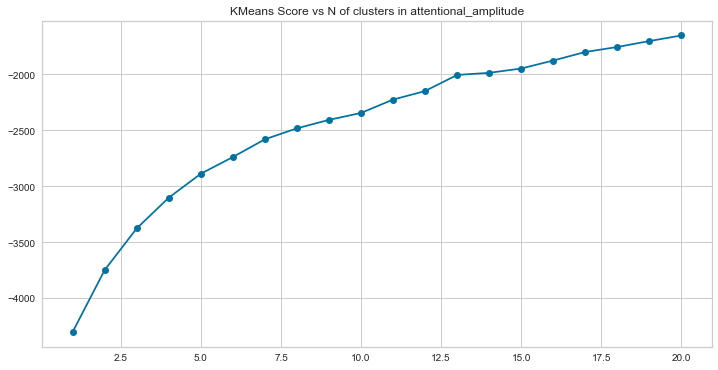

attentional_amplitude silhouette analysis using yellowbrick


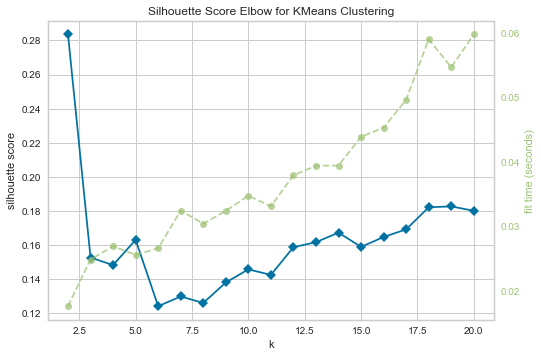

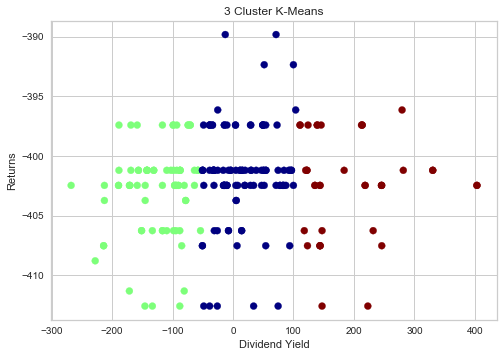

audio_verbal_work_memory
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.285654
1             2        3668.005412    -3668.005412     3.953603
2             3        3195.242806    -3195.242806     3.688082
3             4        2946.093554    -2946.093554     3.543395
4             5        2769.914198    -2769.914198     3.432570
audio_verbal_work_memory score analysis


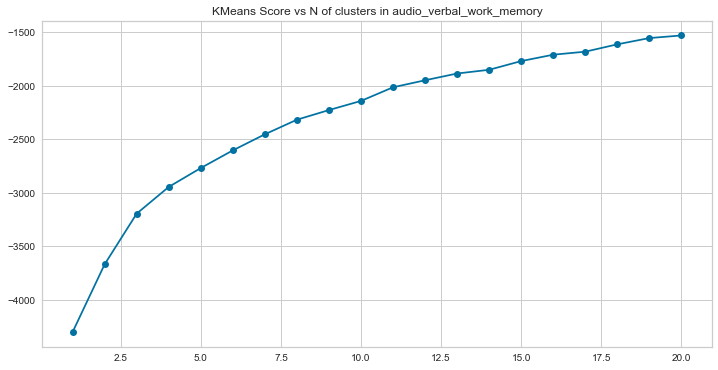

audio_verbal_work_memory silhouette analysis using yellowbrick


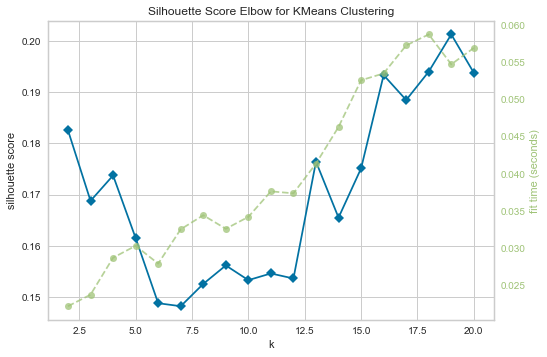

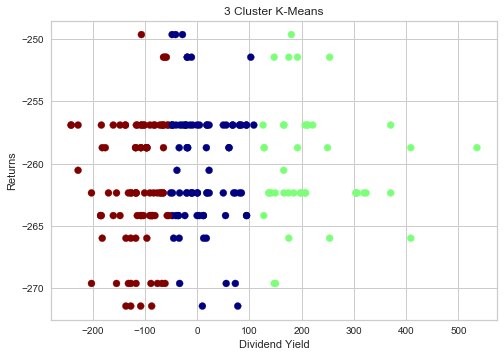

encoded_audioverbal_memory
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.209642
1             2        3612.885773    -3612.885773     3.903209
2             3        3105.223353    -3105.223353     3.610316
3             4        2854.963977    -2854.963977     3.472171
4             5        2658.752365    -2658.752365     3.332858
encoded_audioverbal_memory score analysis


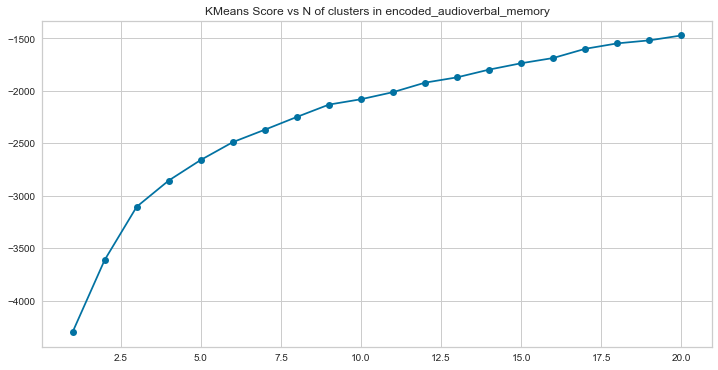

encoded_audioverbal_memory silhouette analysis using yellowbrick


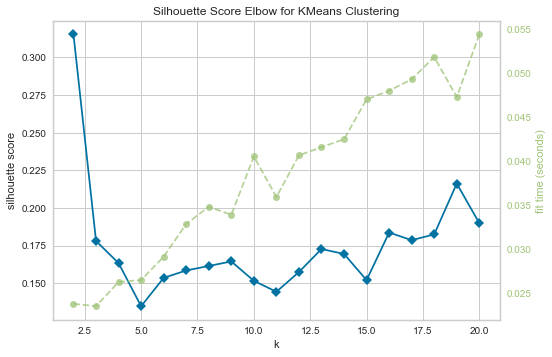

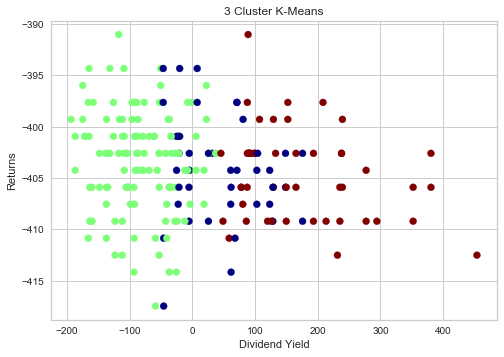

visual_memory
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.272907
1             2        3610.241333    -3610.241333     3.883149
2             3        3195.663418    -3195.663418     3.636963
3             4        2951.674883    -2951.674883     3.505068
4             5        2785.832057    -2785.832057     3.442862
visual_memory score analysis


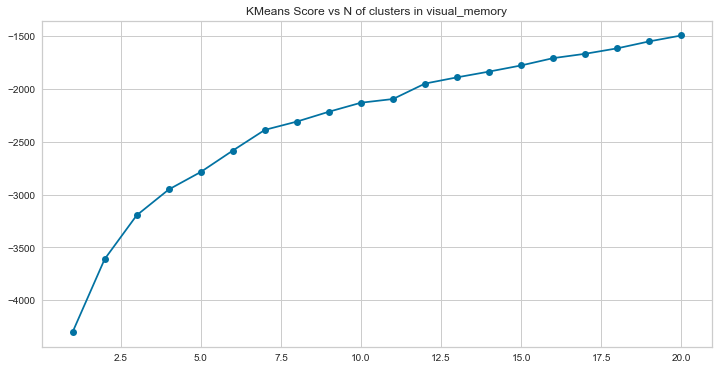

visual_memory silhouette analysis using yellowbrick


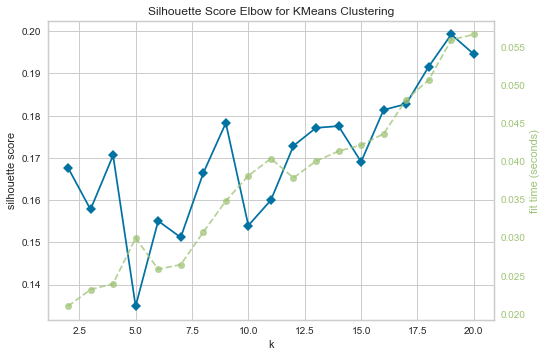

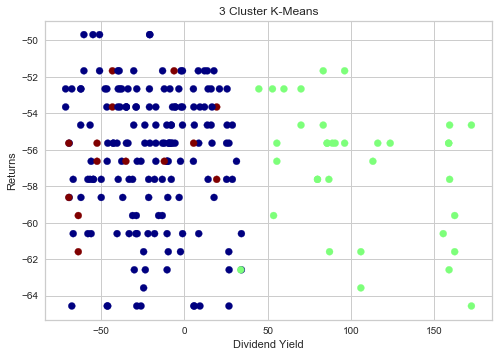

audioverbal_memory
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4260.000000    -4260.000000     4.229685
1             2        3505.692401    -3505.692401     3.877613
2             3        3093.228854    -3093.228854     3.644389
3             4        2806.213143    -2806.213143     3.449099
4             5        2536.913672    -2536.913672     3.299244
audioverbal_memory score analysis


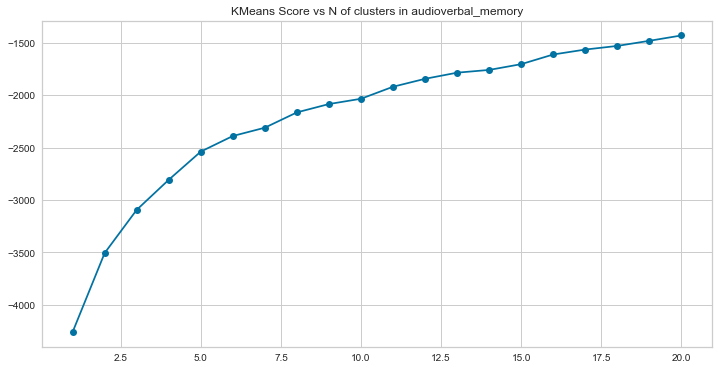

audioverbal_memory silhouette analysis using yellowbrick


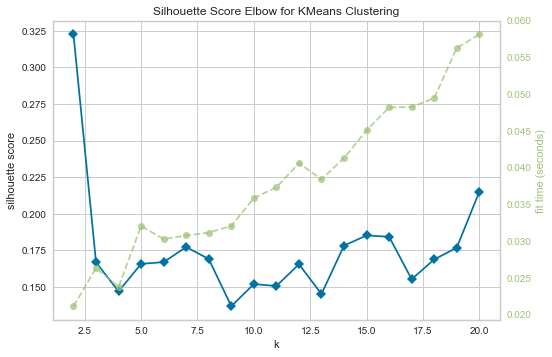

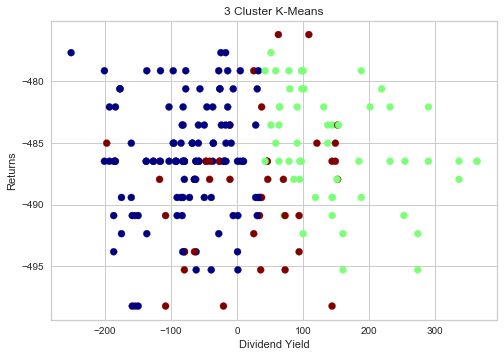

selective_attention
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.234468
1             2        3723.616271    -3723.616271     3.897448
2             3        3348.583055    -3348.583055     3.682109
3             4        2991.668253    -2991.668253     3.587748
4             5        2881.783184    -2881.783184     3.453537
selective_attention score analysis


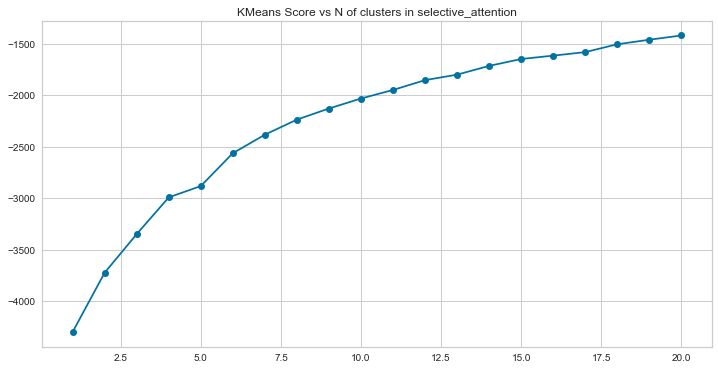

selective_attention silhouette analysis using yellowbrick


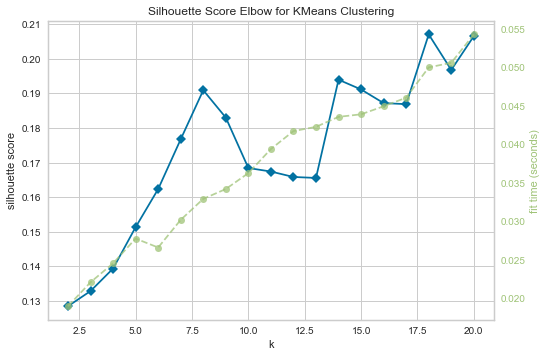

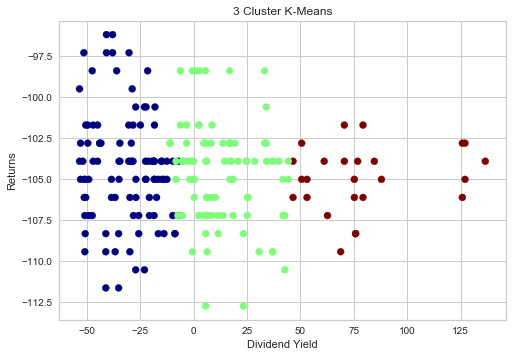

visual_memory.1
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.150818
1             2        3749.465376    -3749.465376     3.844928
2             3        3284.573810    -3284.573810     3.619127
3             4        2904.278452    -2904.278452     3.500564
4             5        2703.127109    -2703.127109     3.375878
visual_memory.1 score analysis


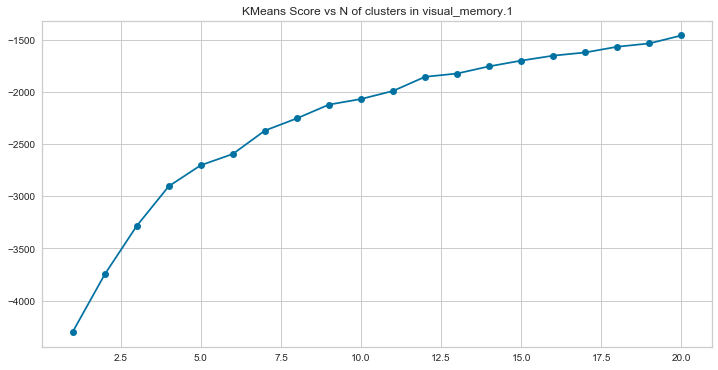

visual_memory.1 silhouette analysis using yellowbrick


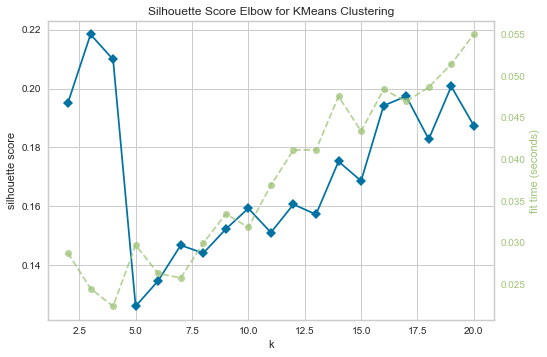

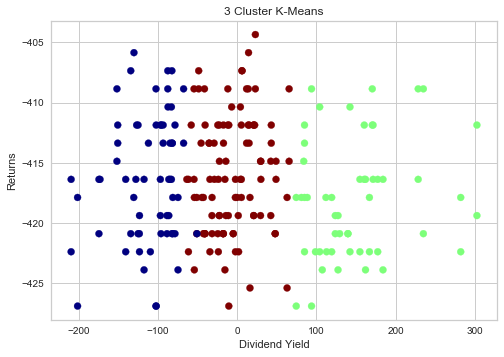

visual_espacial_amplitude
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.334899
1             2        3658.601160    -3658.601160     3.970773
2             3        3367.774827    -3367.774827     3.805392
3             4        3106.674039    -3106.674039     3.653271
4             5        2890.318524    -2890.318524     3.525798
visual_espacial_amplitude score analysis


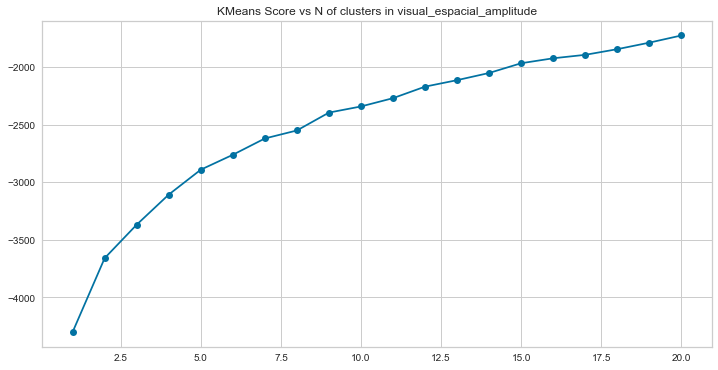

visual_espacial_amplitude silhouette analysis using yellowbrick


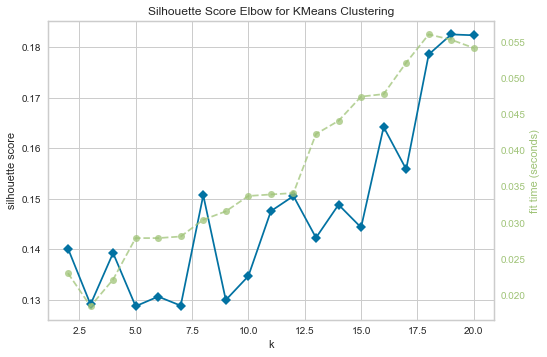

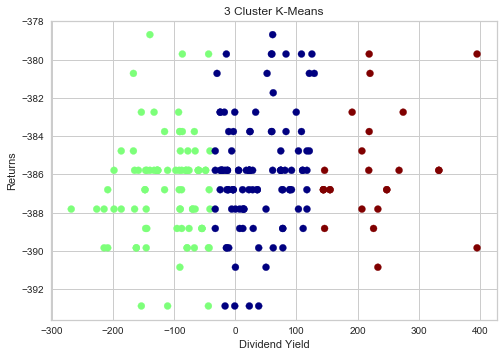

visual_espacial_work_memory
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.212030
1             2        3732.485930    -3732.485930     3.920028
2             3        3331.014518    -3331.014518     3.680320
3             4        3096.494321    -3096.494321     3.541362
4             5        2852.249664    -2852.249664     3.428995
visual_espacial_work_memory score analysis


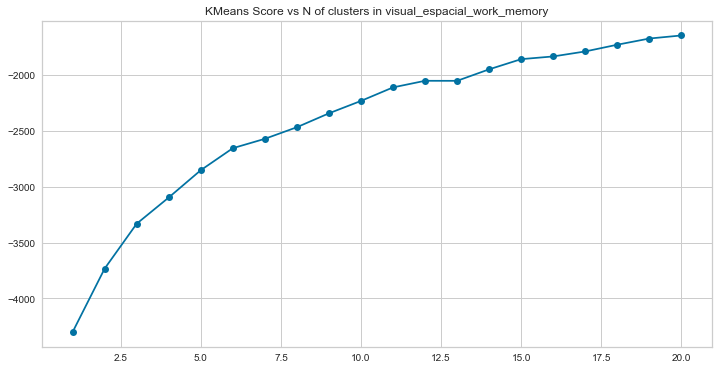

visual_espacial_work_memory silhouette analysis using yellowbrick


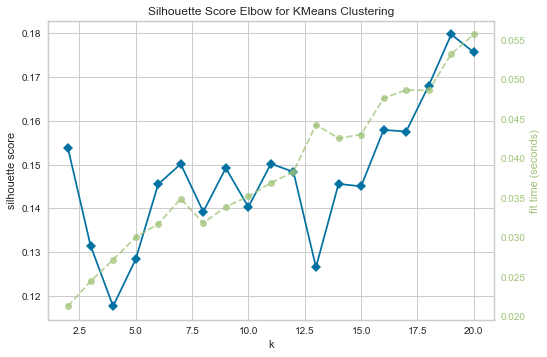

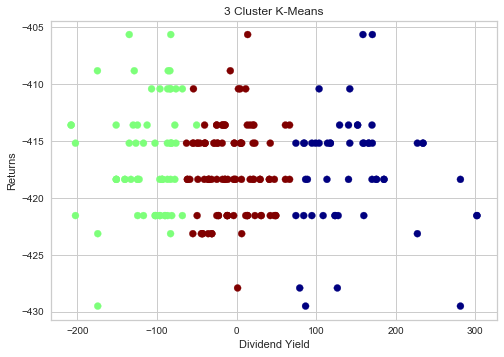

sustained_attention
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.294681
1             2        3483.409210    -3483.409210     3.838053
2             3        3165.409679    -3165.409679     3.667324
3             4        2905.168794    -2905.168794     3.512498
4             5        2698.445289    -2698.445289     3.383399
sustained_attention score analysis


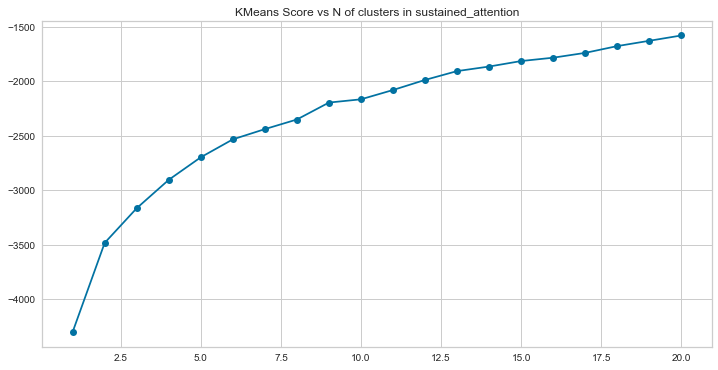

sustained_attention silhouette analysis using yellowbrick


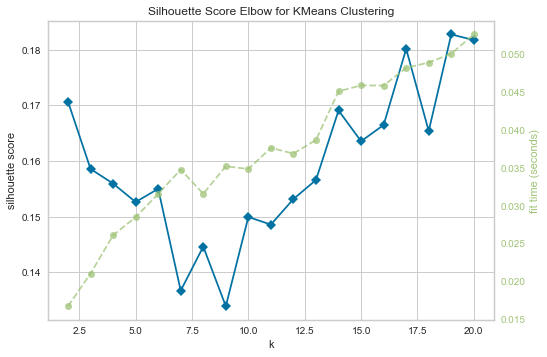

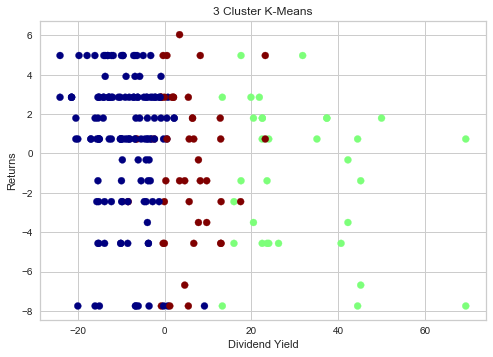

time_inhibitory_control
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4220.000000    -4220.000000     4.285429
1             2        3657.067706    -3657.067706     3.967354
2             3        3308.790388    -3308.790388     3.772419
3             4        3019.371416    -3019.371416     3.637866
4             5        2764.474065    -2764.474065     3.471661
time_inhibitory_control score analysis


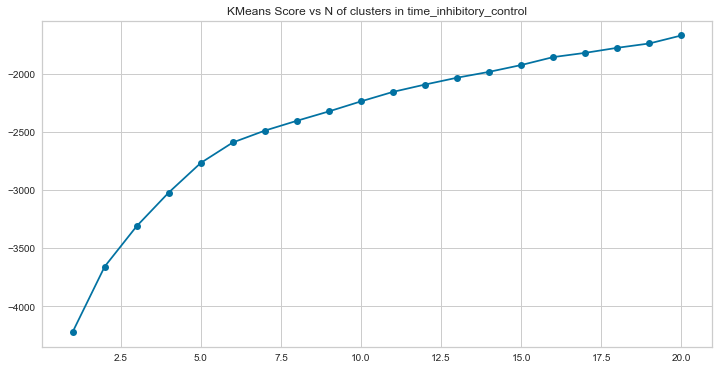

time_inhibitory_control silhouette analysis using yellowbrick


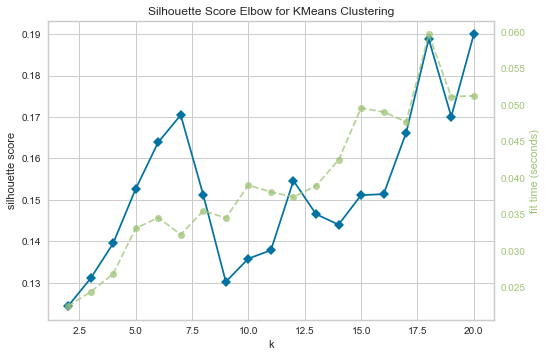

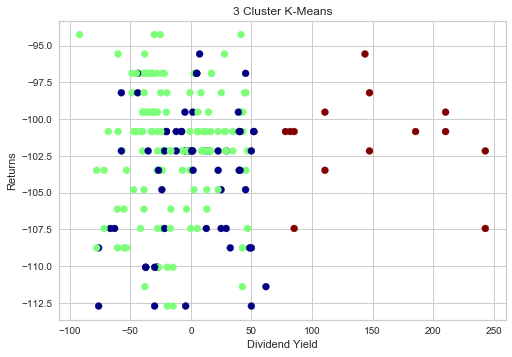

inhibitory_control_hit
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4180.000000    -4180.000000     4.276051
1             2        3458.155847    -3458.155847     3.898010
2             3        3086.988571    -3086.988571     3.676353
3             4        2820.703423    -2820.703423     3.528050
4             5        2616.287548    -2616.287548     3.369464
inhibitory_control_hit score analysis


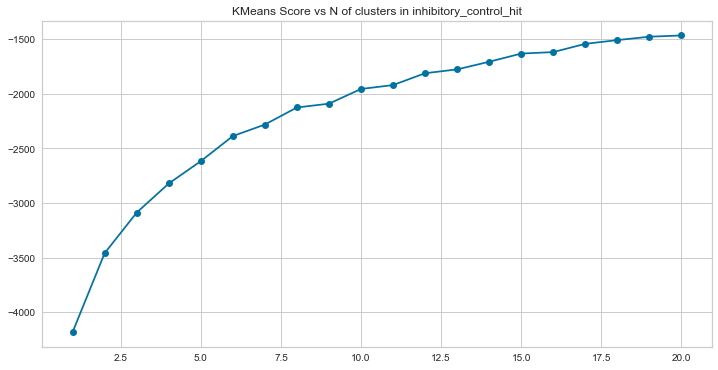

inhibitory_control_hit silhouette analysis using yellowbrick


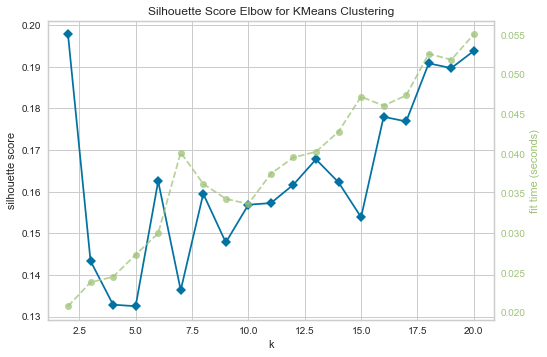

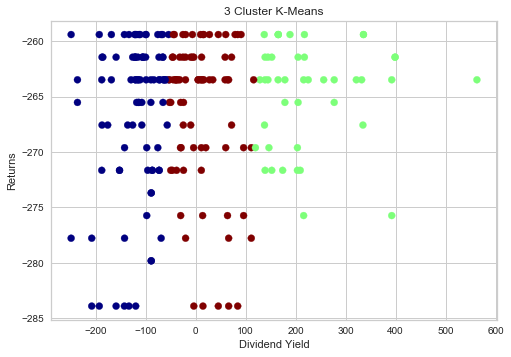

visual_synthesis
   num_clusters  cluster_intertias  cluster_scores  cluster_bic
0             1        4300.000000    -4300.000000     4.266614
1             2        3788.871757    -3788.871757     3.975522
2             3        3468.982132    -3468.982132     3.786613
3             4        3197.719365    -3197.719365     3.649382
4             5        2998.558095    -2998.558095     3.536105
visual_synthesis score analysis


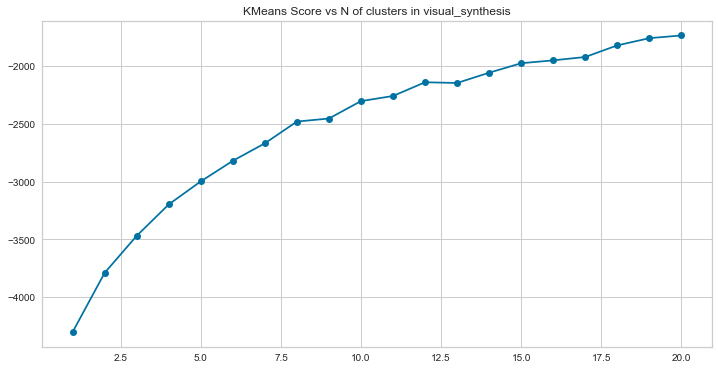

visual_synthesis silhouette analysis using yellowbrick


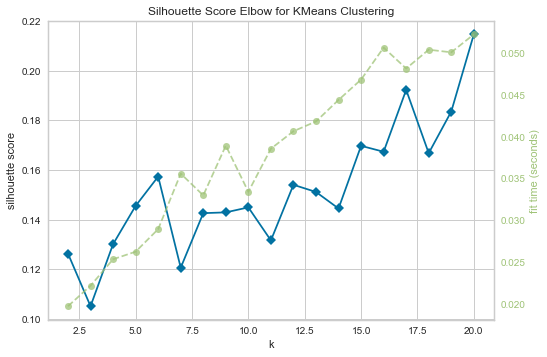

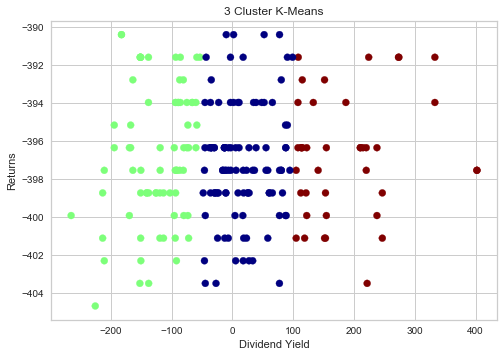

In [18]:
plot_all_interpretations_with_kmeans(big_df, big_df_corr, vars_in_game)

In [19]:
#best_cluster_num = pd.DataFrame({"best_cluster_num":[3,5,2,3,4,4,4,5,3,3,3,3,3,4,2,5]})

best_cluster_number = pd.DataFrame({"age":[3],
                                    "school_grade":[5],
                                    "gender":[2], 
                                    "attentional_amplitude":[3],
                                    "audio_verbal_work_memory":[4],
                                    "encoded_audioverbal_memory":[4],
                                    "visual_memory":[4],
                                    "audioverbal_memory":[5],
                                    "selective_attention":[3],
                                    "visual_memory.1":[3],
                                    "visual_espacial_amplitude":[3],
                                    "visual_espacial_work_memory":[3],
                                    "sustained_attention":[3],
                                    "time_inhibitory_control":[4],
                                    "inhibitory_control_hit":[3],
                                    "visual_synthesis":[4]})
best_cluster_number.head(5)

,age,school_grade,gender,attentional_amplitude,audio_verbal_work_memory,encoded_audioverbal_memory,visual_memory,audioverbal_memory,selective_attention,visual_memory.1,visual_espacial_amplitude,visual_espacial_work_memory,sustained_attention,time_inhibitory_control,inhibitory_control_hit,visual_synthesis
0,3,5,2,3,4,4,4,5,3,3,3,3,3,4,3,4


# KMeans Clustering Labeling and Linear Regression on each variable

In [20]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def plot_kmeans_and_linear_regresion(all_data_df, corr_df, vars_in_game, best_n):
    print("Working...")
    i = 0
    for column in corr_df:
        a = corr_df[[column]].sort_values(by=column, ascending=True).head(10)
        b = corr_df[[column]].sort_values(by=column, ascending=False).head(10)    
        c = list(a.index)+list(b.index)+list([column])
        vars_df = all_data_df[c].dropna(how='any',axis=0) 
        Y = vars_df[[column]]
        X = vars_df.drop(column, axis=1)
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(X)
        n = best_n.at[0, column]
        print(column+ " best cluster number: "+str(n)+"\n")
        kmeans = KMeans(n_clusters=n, max_iter=300, n_init=3, random_state=100)
        kmeans.fit(scaled_data)
        print("Given labels by KMeans")
        print(kmeans.labels_)
        print("\n")
        X_train1, X_test1, y_train1, y_test1 = train_test_split(scaled_data, Y, test_size=0.3, random_state=101)
        lm1 = LinearRegression()
        lm1.fit(X_train1, y_train1)
        predictions1 = lm1.predict(X_test1)
        print("Predictions with original scores\n")
        print(predictions1)
        print("\n")
        print("Classification report with original scores\n")
        print(classification_report(y_test1.astype(int), predictions1.astype(int)))
        print("\n")
        X_train, X_test, y_train, y_test = train_test_split(scaled_data, kmeans.labels_, test_size=0.3, random_state=101)
        lm = LinearRegression()
        lm.fit(X_train, y_train)
        predictions = lm.predict(X_test)
        print("Predictions with calculated scale using KMeans\n")
        print(predictions)
        print("\n")
        print("Classification report calculated scale using KMeans\n")
        print(classification_report(y_test.astype(int), predictions.astype(int)))
        print("\n")


In [21]:
plot_kmeans_and_linear_regresion(big_df, big_df_corr, vars_in_game, best_cluster_number)

Working...
age best cluster number: 3

Given labels by KMeans
[2 2 2 2 2 2 2 2 0 0 2 2 1 1 0 0 0 0 2 0 0 0 0 2 2 2 2 2 2 2 2 0 0 2 2 2 2
 1 1 2 2 2 2 0 0 2 2 2 2 1 1 1 1 2 2 2 2 2 2 0 0 0 0 2 1 1 1 2 2 1 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 2 2 2 2 1 1 2 2 0 0 2 2 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 2 1
 1 2 2 0 0 2 2 2 2 2 2 2 2 0 0 2 2 1 1 0 0 0 0 1 2 2 0 0 0 0 0 1 1 0 0 1 1
 2 2 1 1 1 1 1 2 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 2 0 2 1 2 1]


Predictions with original scores

[[ 9.88894088]
 [ 6.01469205]
 [ 9.59259752]
 [ 9.24712035]
 [10.08207057]
 [ 9.75473174]
 [10.13623596]
 [ 8.43097038]
 [ 7.27814799]
 [ 8.3195178 ]
 [ 9.00304886]
 [ 8.58798019]
 [ 9.33279565]
 [ 8.32334087]
 [ 9.323427  ]
 [10.75114696]
 [ 7.83352316]
 [ 6.48725042]
 [ 8.3694111 ]
 [ 7.90998981]
 [ 9.4918757 ]
 [ 6.01469205]
 [10.02730227]
 [ 7.46702698]
 [ 7.82953063]
 [ 9.4611906 ]
 [ 7.25315633]
 [ 9.53319091]
 [10.49328896]
 [ 6.95649939]
 [ 9.53319091]


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/m

Predictions with original scores

[[ 9.20733337]
 [ 9.60859724]
 [ 8.83866634]
 [ 6.45104758]
 [11.12879089]
 [10.24201635]
 [ 8.87192512]
 [ 9.92379094]
 [ 8.83866634]
 [10.21316707]
 [10.21135813]
 [10.55771776]
 [ 5.1116292 ]
 [ 9.43636745]
 [12.64552377]
 [10.55771776]
 [ 9.35001343]
 [10.55725754]
 [ 7.1276657 ]
 [ 7.55461211]
 [ 9.46643681]
 [ 6.80100608]
 [ 9.69143037]
 [10.75902305]
 [ 9.02641287]
 [ 9.45648023]
 [ 7.55461211]
 [11.13526056]
 [ 9.96111397]
 [10.5309163 ]
 [11.06152679]
 [ 9.68808854]
 [ 9.49236065]
 [10.12769709]
 [ 9.33871797]
 [11.33975848]
 [11.80593407]
 [ 8.58404649]
 [ 8.19451733]
 [ 6.91220176]
 [ 7.13591638]
 [ 6.42106742]
 [ 8.39170015]
 [ 6.80100608]
 [ 9.46643681]
 [10.21316707]
 [ 9.49951591]
 [10.40802483]
 [10.53408282]
 [ 9.76042282]
 [10.52598446]
 [ 7.68022972]
 [10.09923981]
 [10.69182824]
 [ 8.8710909 ]
 [10.27018951]
 [ 8.48408792]
 [10.05739839]
 [10.90716067]
 [ 6.31693891]
 [ 6.52699443]
 [ 8.87221233]
 [ 9.97496776]
 [ 8.22473649]]


Cla

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-pa